In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv("/content/drive/MyDrive/롤 데이터 분석/data/data.csv")
df.head()

,tier,champExperience,champLevel,championName,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,soloKills,stealthWardsPlaced,survivedThreeImmobilizesInFight,teamDamagePercentage,turretPlatesTaken,visionScoreAdvantageLaneOpponent,visionScorePerMinute,wardTakedowns,wardTakedownsBefore20M,wardsGuarded
0,BRONZE,14444,15,Poppy,2,4,1291,1396,1291,37543,...,0,11,4,0.136533,2,0.326022,0.683416,1,0,0
1,BRONZE,7904,11,Braum,2,6,0,0,0,19919,...,0,10,2,0.122879,1,-0.420499,1.147305,3,1,0
2,BRONZE,12153,14,Morgana,1,10,1515,1922,1515,14613,...,0,13,2,0.174090,1,-0.135613,1.542737,3,1,0
3,BRONZE,8014,11,Thresh,3,5,1420,2703,1420,13896,...,0,15,1,0.071151,0,-0.278238,1.656584,4,3,0
4,BRONZE,11402,13,Ziggs,1,6,530,951,530,12118,...,0,14,2,0.156749,1,-0.552488,0.912949,2,2,0


In [207]:
df = df.drop(columns=['item0'])

In [208]:
df.select_dtypes('float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184434 entries, 0 to 184433
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   damagePerMinute                   184434 non-null  float64
 1   damageTakenOnTeamPercentage       184434 non-null  float64
 2   effectiveHealAndShielding         184434 non-null  float64
 3   goldPerMinute                     184434 non-null  float64
 4   jungleCsBefore10Minutes           184434 non-null  float64
 5   kda                               184434 non-null  float64
 6   killParticipation                 184434 non-null  float64
 7   maxCsAdvantageOnLaneOpponent      184434 non-null  float64
 8   maxLevelLeadLaneOpponent          184434 non-null  float64
 9   teamDamagePercentage              184434 non-null  float64
 10  visionScoreAdvantageLaneOpponent  184434 non-null  float64
 11  visionScorePerMinute              184434 non-null  f

In [209]:
bronze = df[df['tier'] == 'BRONZE']
silver = df[df['tier'] == 'SILVER']
gold = df[df['tier'] == 'GOLD']
platinum = df[df['tier'] == 'PLATINUM']
emerald = df[df['tier'] == 'EMERALD']
diamond = df[df['tier'] == 'DIAMOND']

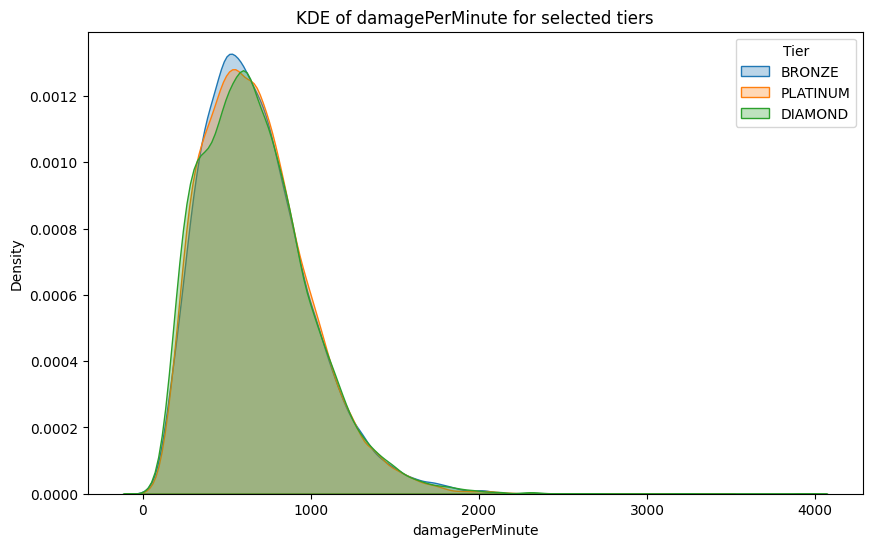

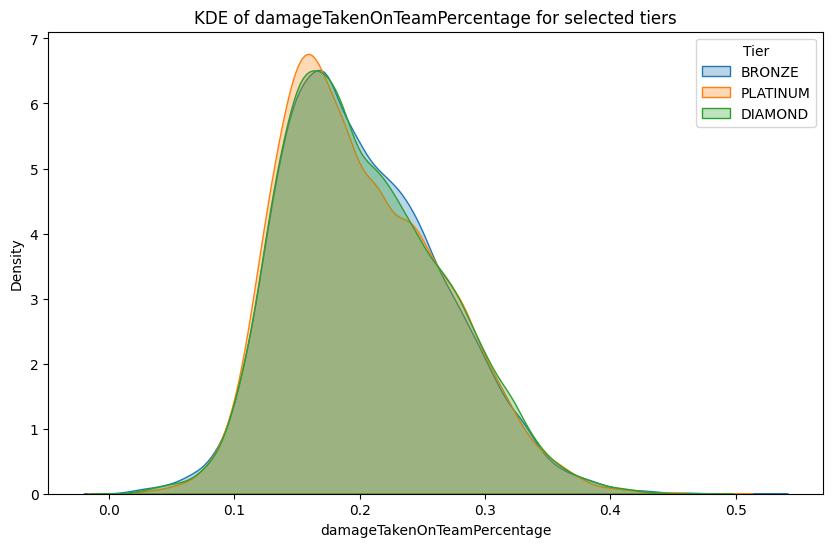

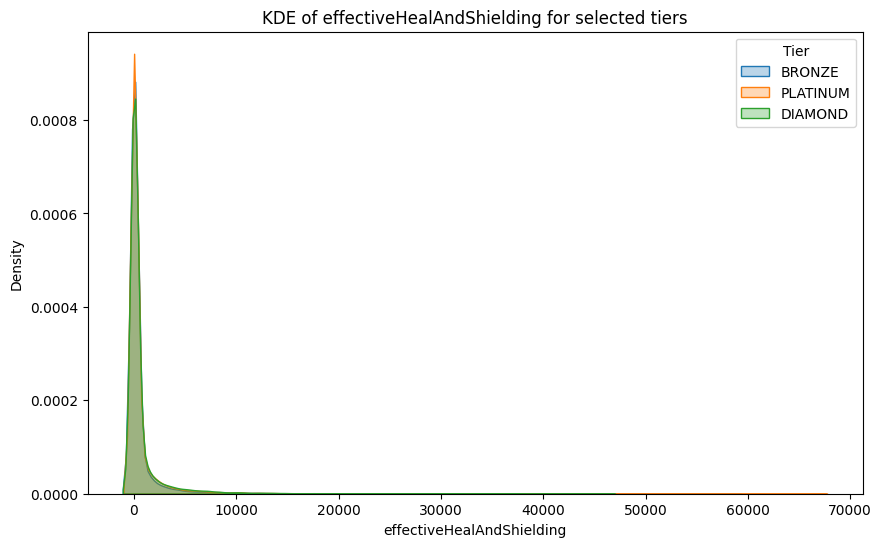

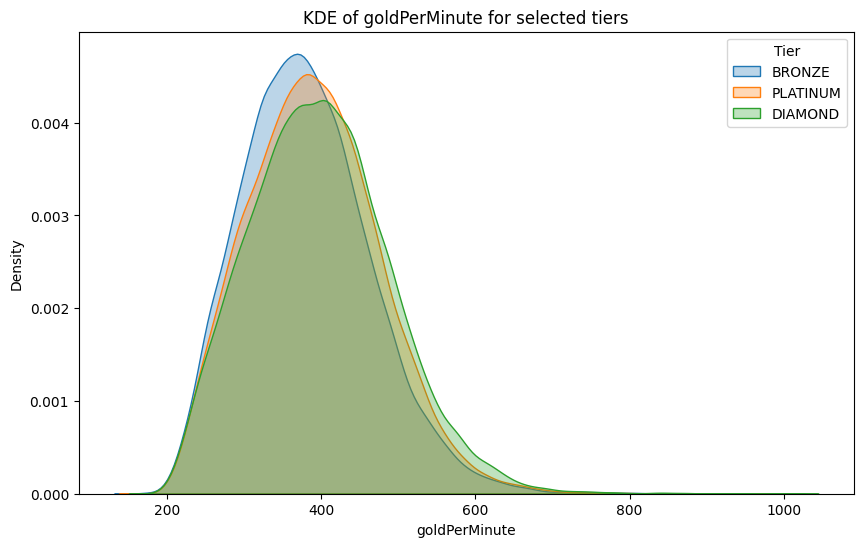

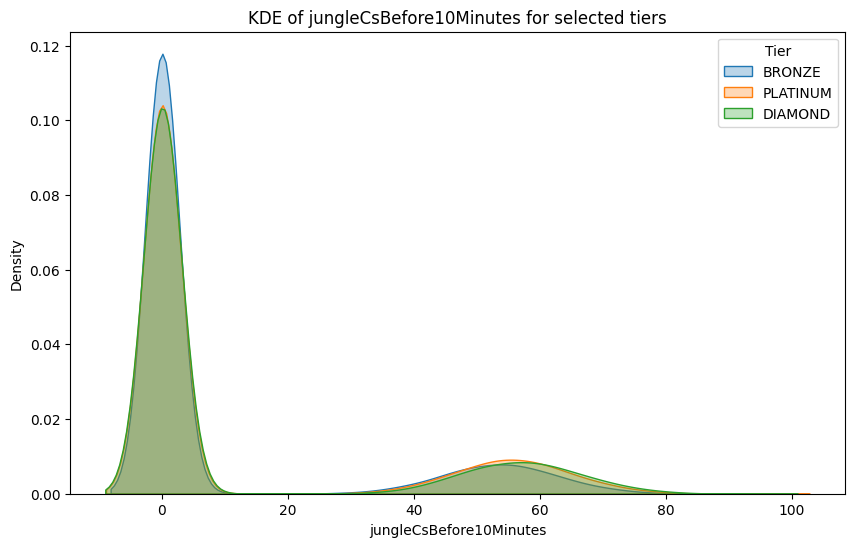

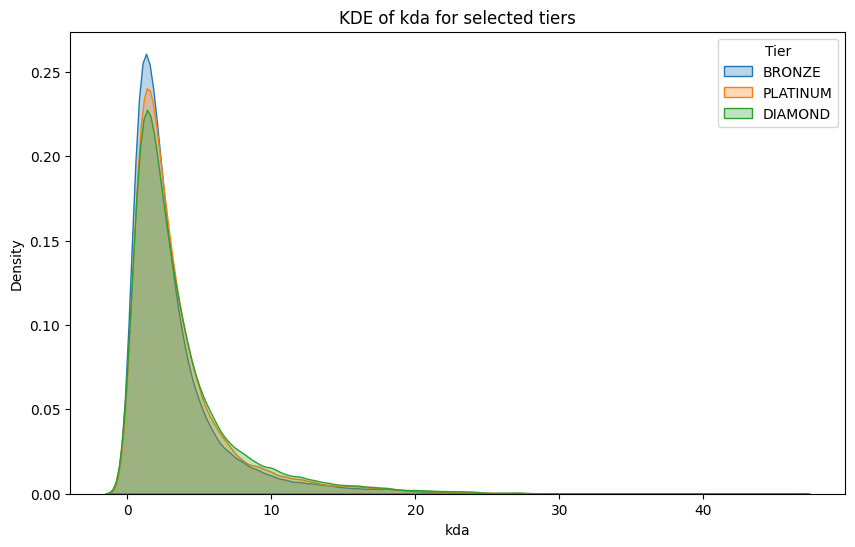

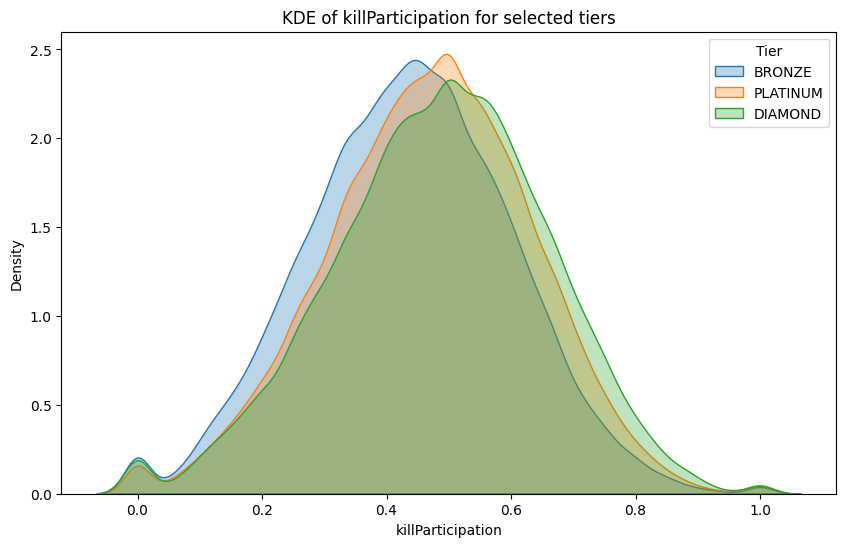

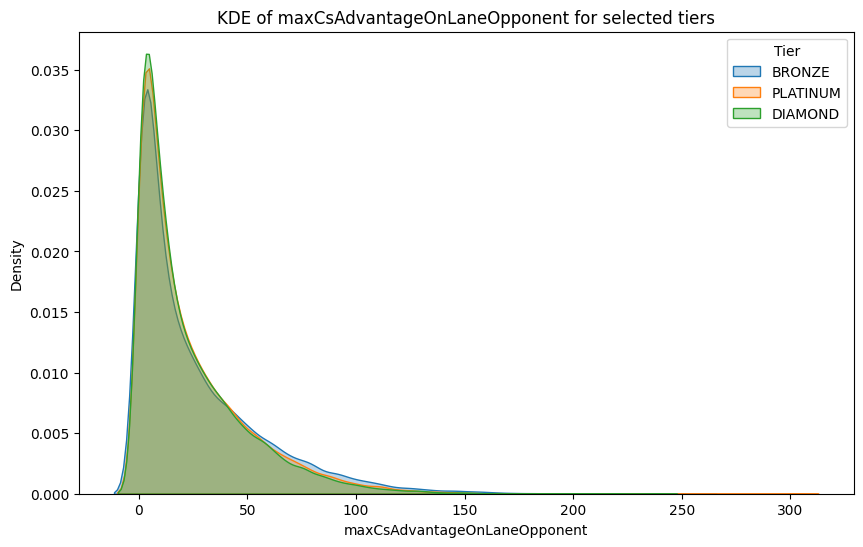

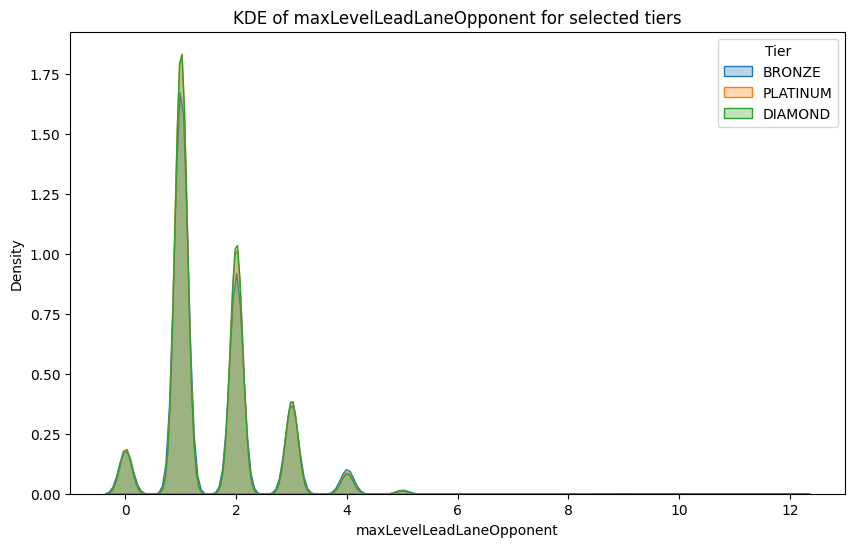

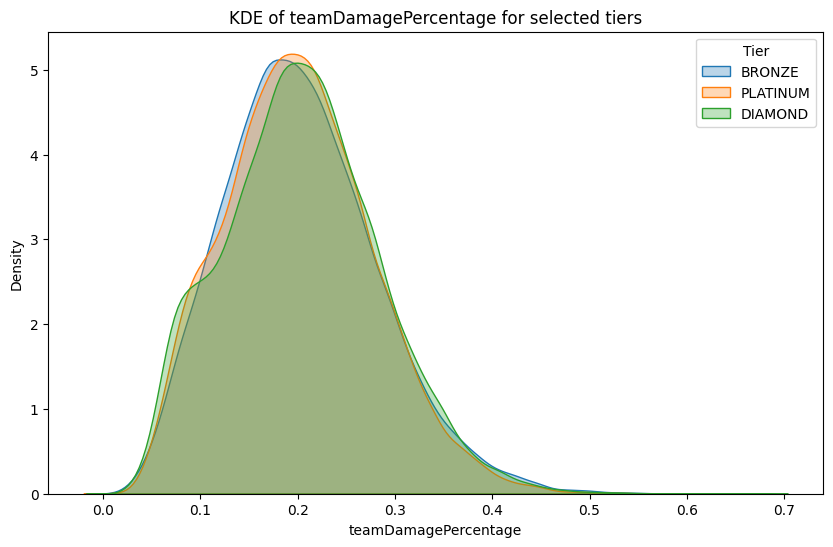

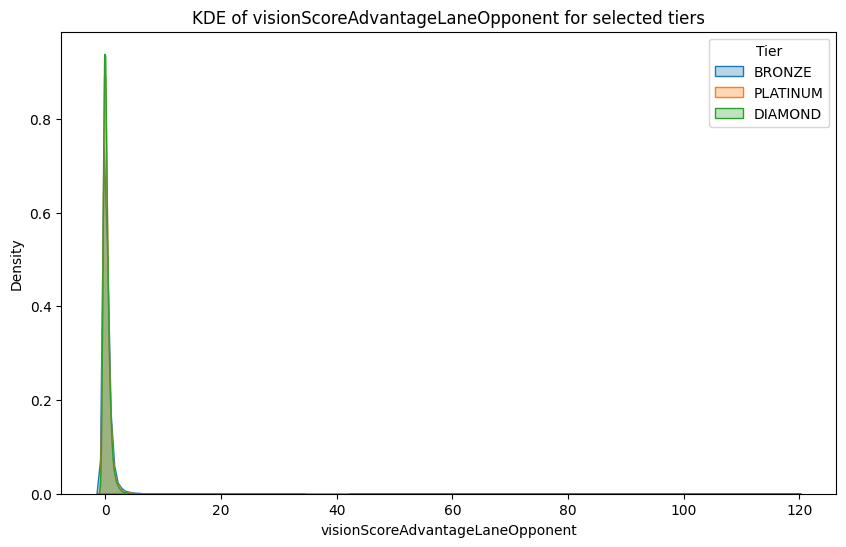

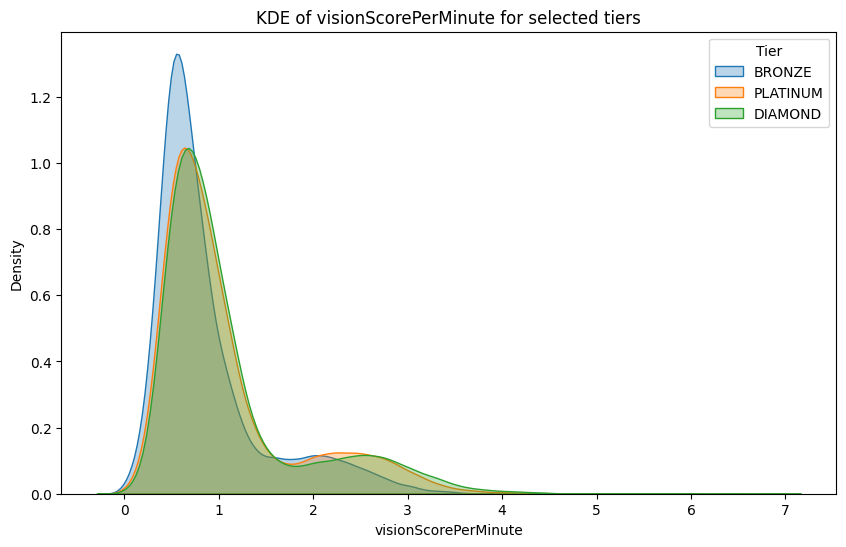

In [210]:
tiers_data = {
    'BRONZE': bronze,
    'SILVER': silver,
    'GOLD': gold,
    'PLATINUM': platinum,
    'EMERALD': emerald,
    'DIAMOND': diamond
}


col_float = df.select_dtypes('float64').columns
selected_tiers = ['BRONZE','PLATINUM', 'DIAMOND']

for col in col_float:
    plt.figure(figsize=(10, 6))
    for tier in selected_tiers:
        subset = tiers_data[tier]  # 선택한 티어의 데이터 사용
        sns.kdeplot(subset[col], label=tier, fill=True, alpha=0.3)

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE of {col} for selected tiers')
    plt.legend(title='Tier')
    plt.show()

# 연속형 실수

## 연속형 실수형


### 의미없음
* maxCsAdvantageOnLaneOpponent, visionScoreAdvantageLaneOpponent(혹시 모르니 log변환),effectiveHealAndShielding(혹시 모르니 log변환)

### 살펴봐야함
* visionScorePerMinute,jungleCsBefore10Minutes 이봉형 약한 언덕(정글은 이유 있음)

### 업데이트 필요
* killParticipation 참여가 아예 0인 애들은 빼야할까.
* 그 외에는 log변환을 하는게 좋을듯 싶다.



In [211]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184434 entries, 0 to 184433
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tier          184434 non-null  object
 1   championName  184434 non-null  object
 2   teamPosition  184434 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


### 범주형
* 타겟 변수 : tier
* teamPosition : 원-핫 인코딩
* championName : 삭제할지 고민중


In [212]:
df['jungleCsBefore10Minutes'].groupby(df['teamPosition']).mean()

,jungleCsBefore10Minutes
teamPosition,
BOTTOM,0.046566
JUNGLE,55.475422
MIDDLE,0.122514
TOP,0.160502
UTILITY,0.052010


### 미니언 (CS)

In [213]:
df.columns[df.columns.str.contains("minion",case=False)]

Index(['neutralMinionsKilled', 'totalEnemyJungleMinionsKilled',
       'totalMinionsKilled', 'laneMinionsFirst10Minutes'],
      dtype='object')

In [214]:
df.columns[df.columns.str.contains("Minute",case=False)]

Index(['damagePerMinute', 'goldPerMinute', 'jungleCsBefore10Minutes',
       'laneMinionsFirst10Minutes', 'visionScorePerMinute'],
      dtype='object')

In [215]:
# 'neutralMinionsKilled','totalMinionsKilled' 티어가 올라갈수록 최종값은 덜 먹음. (게임이 더 빨리 끝나서? 합류 or 한타가 더 많아서?)
# 두 개 일단 제거!!!!
# jungleCsBefore10Minutes+laneMinionsFirst10Minutes 하나의 변수로 10분 지표
# totalEnemyJungleMinionsKilled ['JUNGLE'] 에서만 의미가 있음. 일단은 제거
# totalEnemyJungleMinionsKilled 정글만 의미있을듯
# enemyJungleMonsterKills 쌍봉형 정글 티어에선 의미가 보이는듯

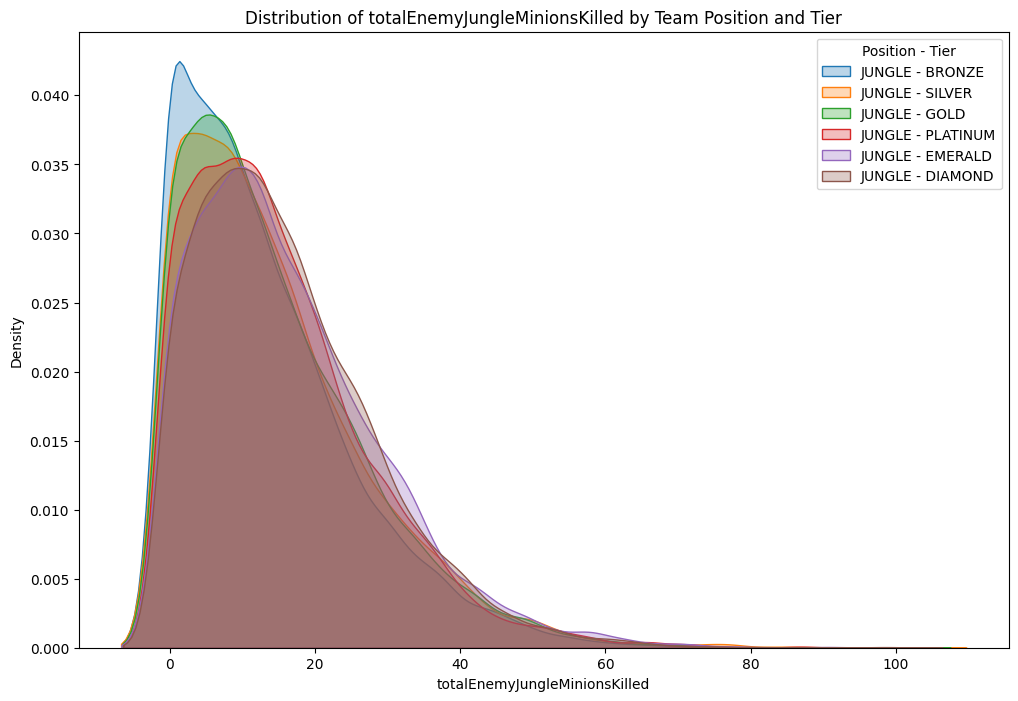

In [216]:
# positions = ['TOP', 'UTILITY', 'JUNGLE', 'BOTTOM', 'MIDDLE']
positions = ['JUNGLE']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['totalEnemyJungleMinionsKilled'], label=f"{position} - {tier}", fill=True, alpha=0.3)

plt.xlabel('totalEnemyJungleMinionsKilled')
plt.ylabel('Density')
plt.title('Distribution of totalEnemyJungleMinionsKilled by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

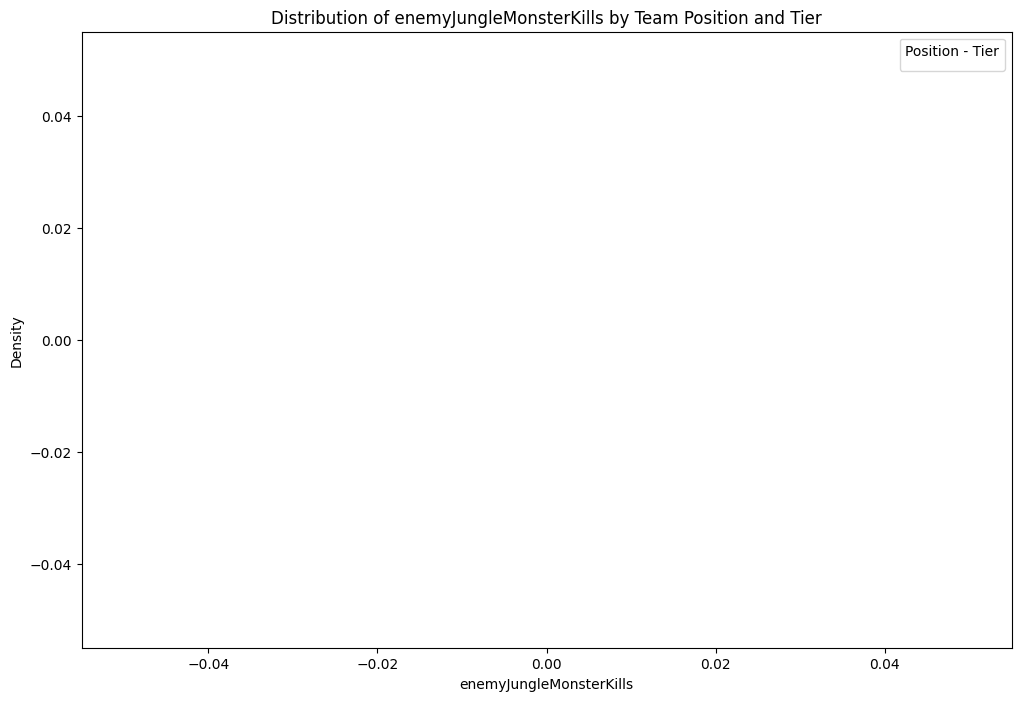

In [217]:
# positions = ['TOP', 'UTILITY', 'JUNGLE', 'BOTTOM', 'MIDDLE']
positions = ['JUNGL']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['enemyJungleMonsterKills'], label=f"{position} - {tier}", fill=True, alpha=0.3)

plt.xlabel('enemyJungleMonsterKills')
plt.ylabel('Density')
plt.title('Distribution of enemyJungleMonsterKills by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

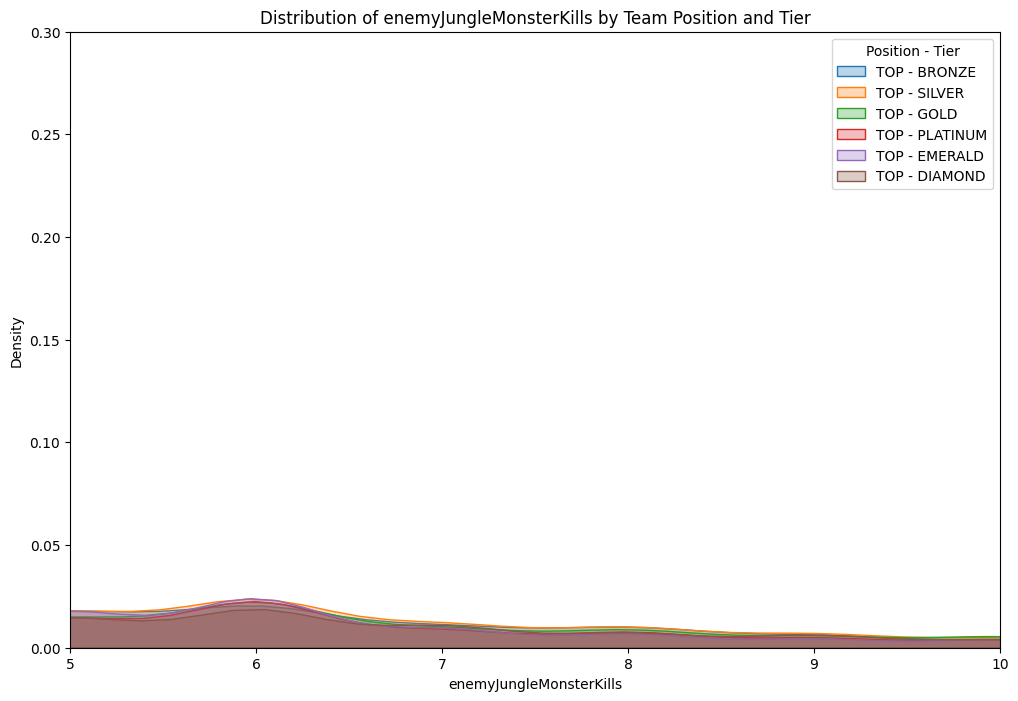

In [218]:
# positions = ['TOP', 'UTILITY', 'JUNGLE', 'BOTTOM', 'MIDDLE']
positions = ['TOP']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['enemyJungleMonsterKills'], label=f"{position} - {tier}", fill=True, alpha=0.3)
plt.xlim(5, 10)
plt.ylim(0, 0.3)
plt.xlabel('enemyJungleMonsterKills')
plt.ylabel('Density')
plt.title('Distribution of enemyJungleMonsterKills by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

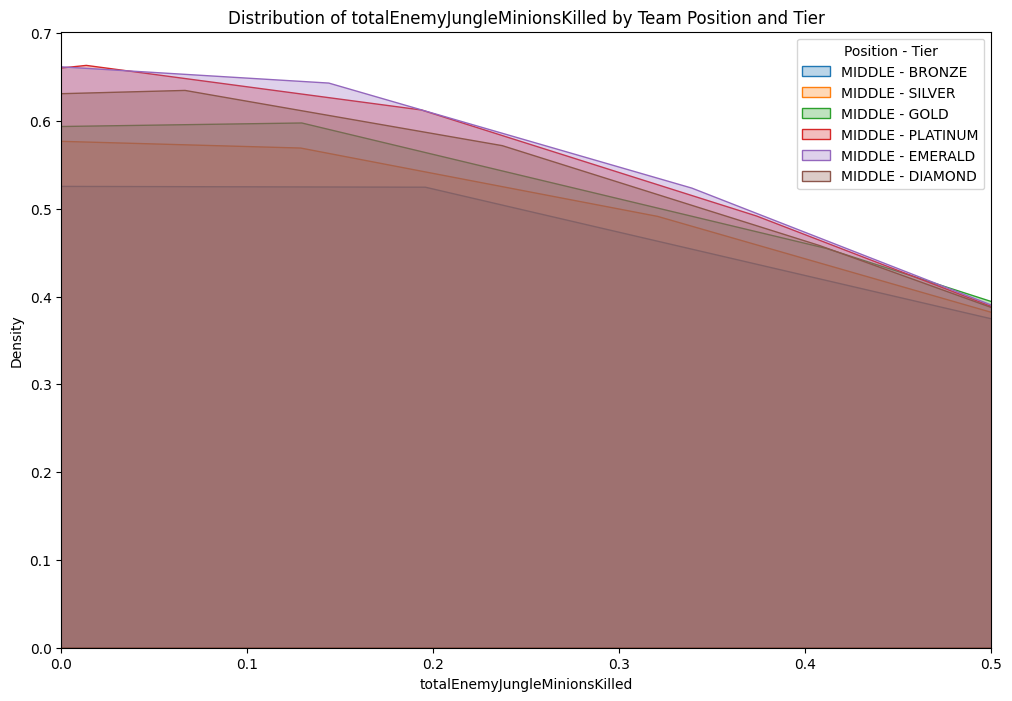

In [219]:
# positions = ['TOP', 'UTILITY', 'JUNGLE', 'BOTTOM', 'MIDDLE']
positions = ['MIDDLE']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['totalEnemyJungleMinionsKilled'], label=f"{position} - {tier}", fill=True, alpha=0.3)
plt.xlim(0, 50)
plt.xlim(0, 0.5)
plt.xlabel('totalEnemyJungleMinionsKilled')
plt.ylabel('Density')
plt.title('Distribution of totalEnemyJungleMinionsKilled by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

In [220]:
df.columns[df.columns.str.contains("jungle",case=False)]

Index(['totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills',
       'jungleCsBefore10Minutes'],
      dtype='object')

In [221]:
df.columns[df.columns.str.contains("cs",case=False)]

Index(['jungleCsBefore10Minutes', 'maxCsAdvantageOnLaneOpponent'], dtype='object')

In [222]:
df['teamPosition'].unique()

array(['TOP', 'UTILITY', 'JUNGLE', 'BOTTOM', 'MIDDLE'], dtype=object)

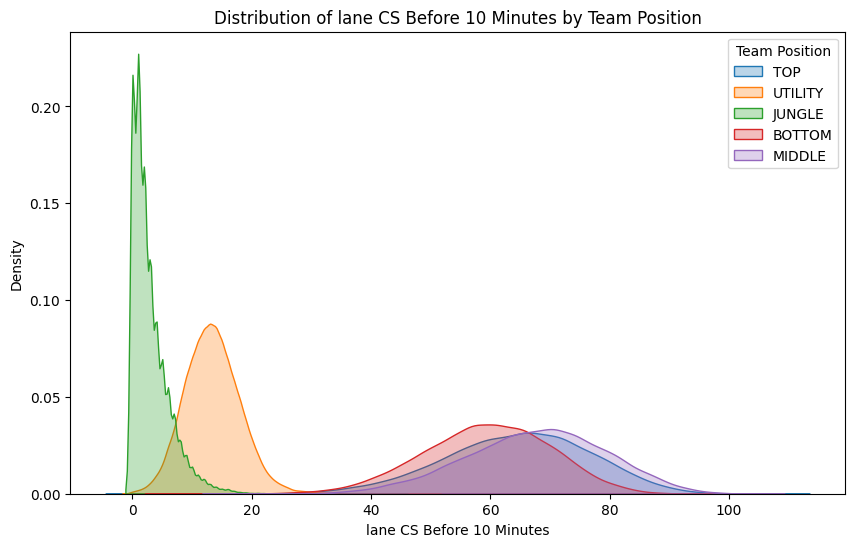

In [223]:
plt.figure(figsize=(10, 6))

x = ['TOP', 'UTILITY','JUNGLE', 'BOTTOM', 'MIDDLE']

for position in x:
    subset = df[df['teamPosition'] == position]
    sns.kdeplot(subset['laneMinionsFirst10Minutes'], label=position, fill=True, alpha=0.3)

plt.xlabel('lane CS Before 10 Minutes')
plt.ylabel('Density')
plt.title('Distribution of lane CS Before 10 Minutes by Team Position')
plt.legend(title='Team Position')
plt.show()

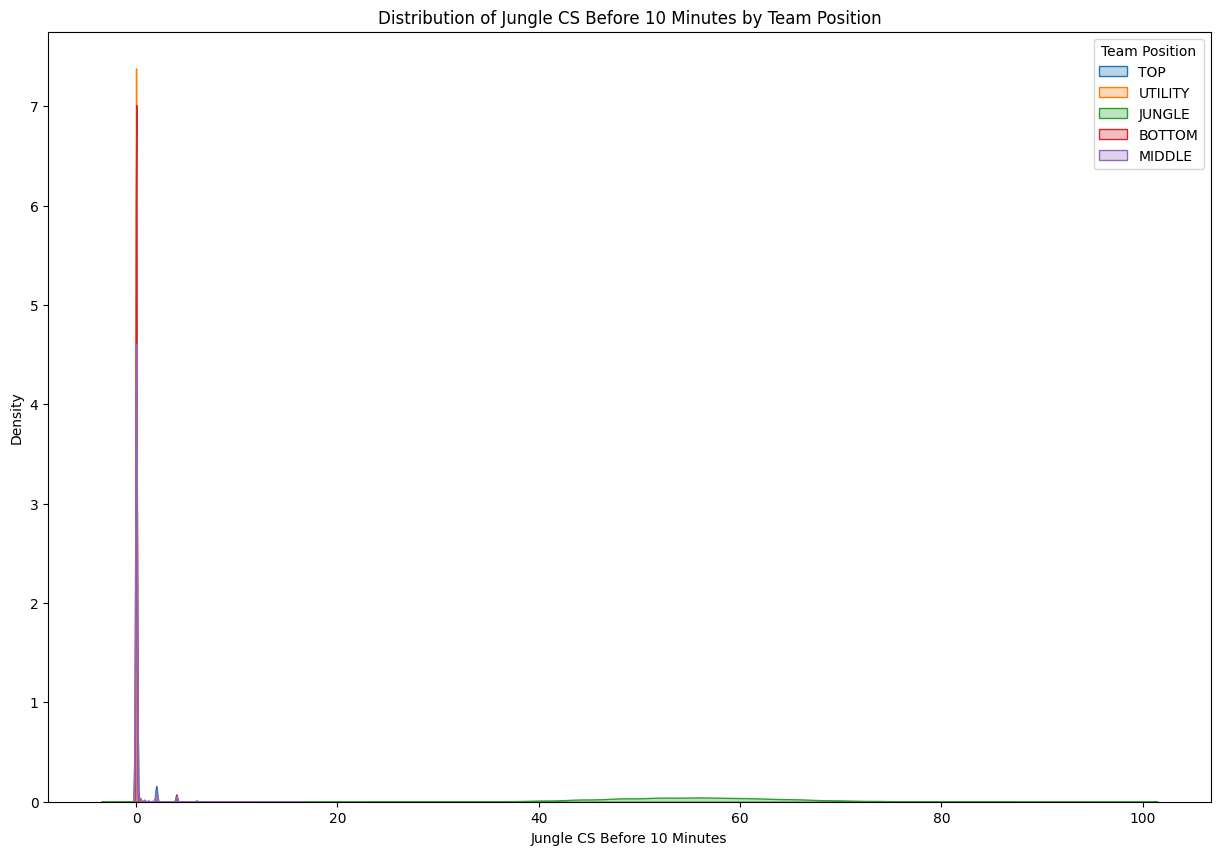

In [224]:
plt.figure(figsize=(15, 10))

x = ['TOP', 'UTILITY','JUNGLE', 'BOTTOM', 'MIDDLE']

for position in x:
    subset = df[df['teamPosition'] == position]
    sns.kdeplot(subset['jungleCsBefore10Minutes'], label=position, fill=True, alpha=0.3)

plt.xlabel('Jungle CS Before 10 Minutes')
plt.ylabel('Density')
plt.title('Distribution of Jungle CS Before 10 Minutes by Team Position')
plt.legend(title='Team Position')
plt.show()

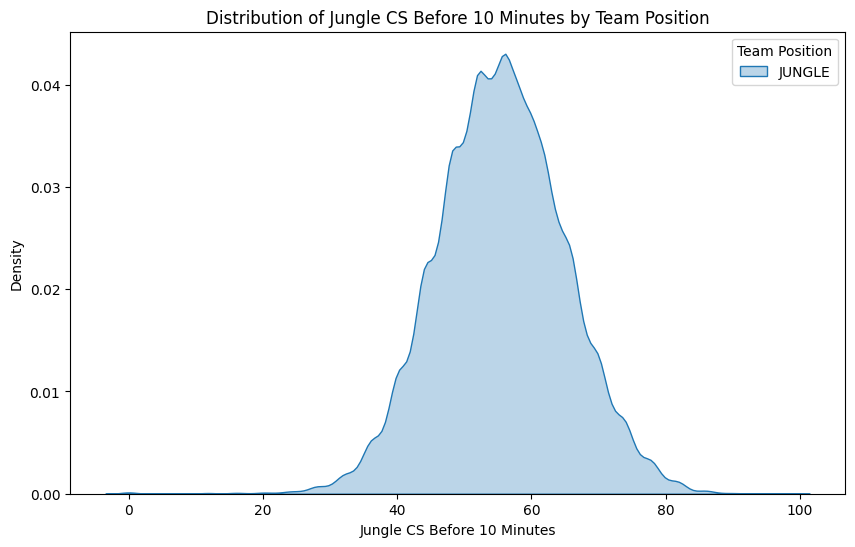

In [225]:
plt.figure(figsize=(10, 6))

x = ['JUNGLE']

for position in x:
    subset = df[df['teamPosition'] == position]
    sns.kdeplot(subset['jungleCsBefore10Minutes'], label=position, fill=True, alpha=0.3)

plt.xlabel('Jungle CS Before 10 Minutes')
plt.ylabel('Density')
plt.title('Distribution of Jungle CS Before 10 Minutes by Team Position')
plt.legend(title='Team Position')
plt.show()

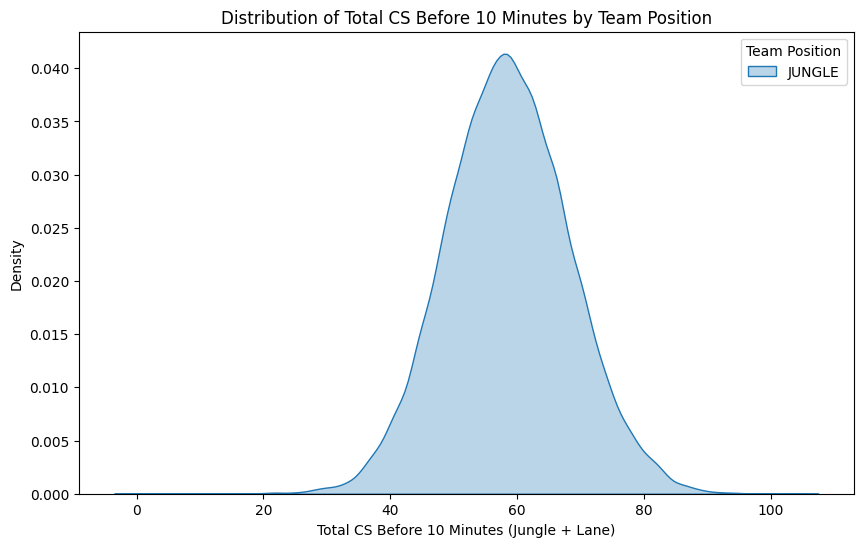

In [226]:
plt.figure(figsize=(10, 6))

x = ['JUNGLE']

for position in x:
    subset = df[df['teamPosition'] == position]
    # jungleCsBefore10Minutes와 laneMinionsFirst10Minutes를 더한 값을 KDE 플롯으로 시각화
    sns.kdeplot(subset['jungleCsBefore10Minutes'] + subset['laneMinionsFirst10Minutes'], label=position, fill=True, alpha=0.3)

plt.xlabel('Total CS Before 10 Minutes (Jungle + Lane)')
plt.ylabel('Density')
plt.title('Distribution of Total CS Before 10 Minutes by Team Position')
plt.legend(title='Team Position')
plt.show()

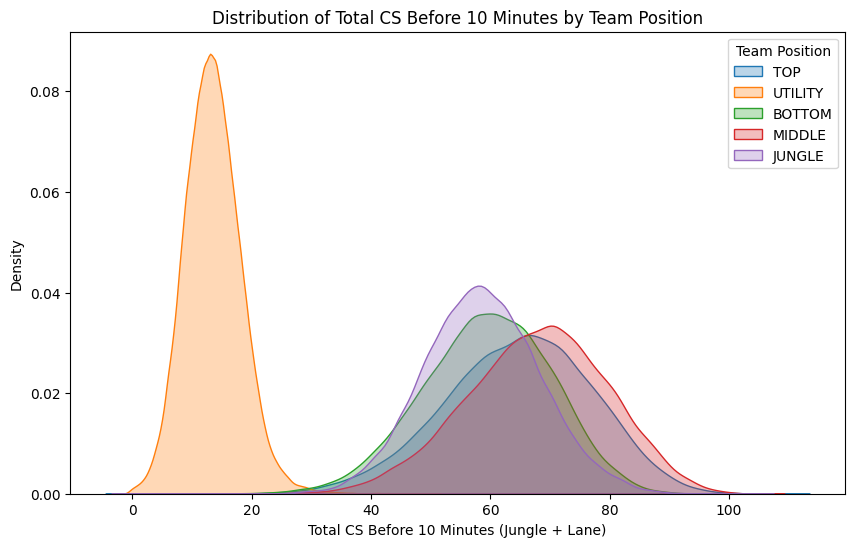

In [227]:
plt.figure(figsize=(10, 6))

x = ['TOP', 'UTILITY', 'BOTTOM', 'MIDDLE','JUNGLE']

for position in x:
    subset = df[df['teamPosition'] == position]
    # jungleCsBefore10Minutes와 laneMinionsFirst10Minutes를 더한 값을 KDE 플롯으로 시각화
    sns.kdeplot(subset['jungleCsBefore10Minutes'] + subset['laneMinionsFirst10Minutes'], label=position, fill=True, alpha=0.3)

plt.xlabel('Total CS Before 10 Minutes (Jungle + Lane)')
plt.ylabel('Density')
plt.title('Distribution of Total CS Before 10 Minutes by Team Position')
plt.legend(title='Team Position')
plt.show()

In [228]:
df['cs_10Minutes'] = df['jungleCsBefore10Minutes']+df['laneMinionsFirst10Minutes']

In [229]:
df = df.drop(columns=['neutralMinionsKilled','totalMinionsKilled', 'totalEnemyJungleMinionsKilled', 'enemyJungleMonsterKills','jungleCsBefore10Minutes','laneMinionsFirst10Minutes'])

In [230]:
df['cs_10Minutes'].head()

,cs_10Minutes
0,38.0
1,12.0
2,14.0
3,14.0
4,22.0


In [231]:
df.shape

(184434, 101)

In [232]:
# maxCsAdvantageOnLaneOpponent, visionScoreAdvantageLaneOpponent(혹시 모르니 log변환),effectiveHealAndShielding(혹시 모르니 log변환)
# 살펴봐야함 : visionScorePerMinute
# killParticipation 참여가 아예 0인 애들은 빼야하는가

* maxCsAdvantageOnLaneOpponent
* visionScoreAdvantageLaneOpponent
* effectiveHealAndShielding
* 미세한 분포의 차이를 딥러닝 모델이 학습할 수 있을까...
* visionScorePerMinute 무조건 필요한 변수
* killParticipation 필수변수 0인 값에도 분포가 존재하는데...

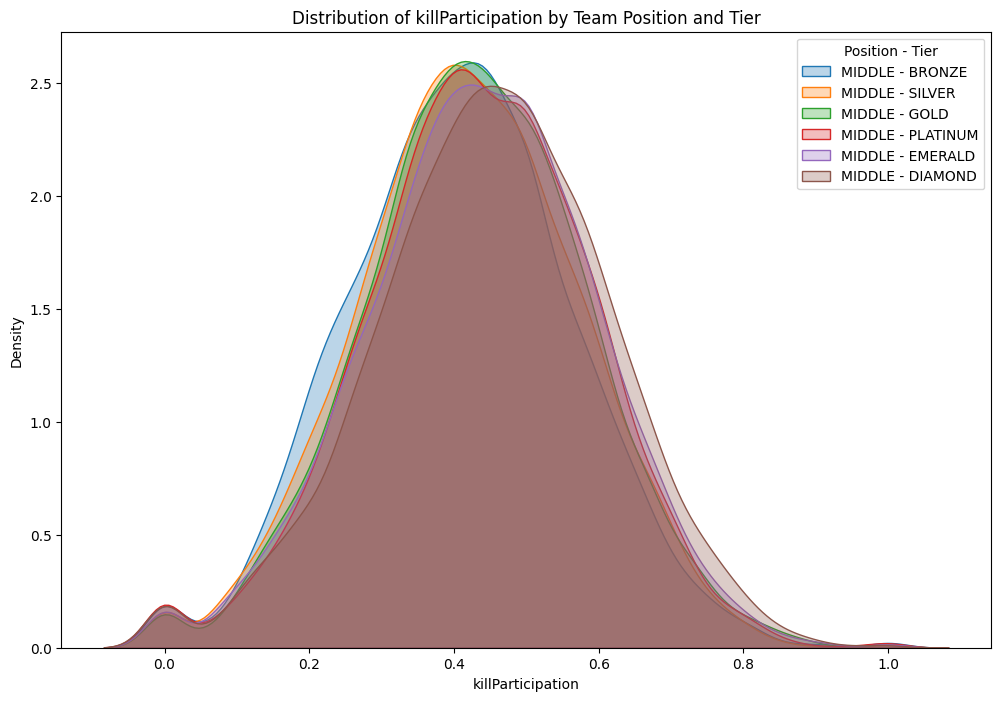

In [233]:
positions = ['MIDDLE']
tiers = ['BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND']

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['killParticipation'], label=f"{position} - {tier}", fill=True, alpha=0.3)

plt.xlabel('killParticipation')
plt.ylabel('Density')
plt.title('Distribution of killParticipation by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

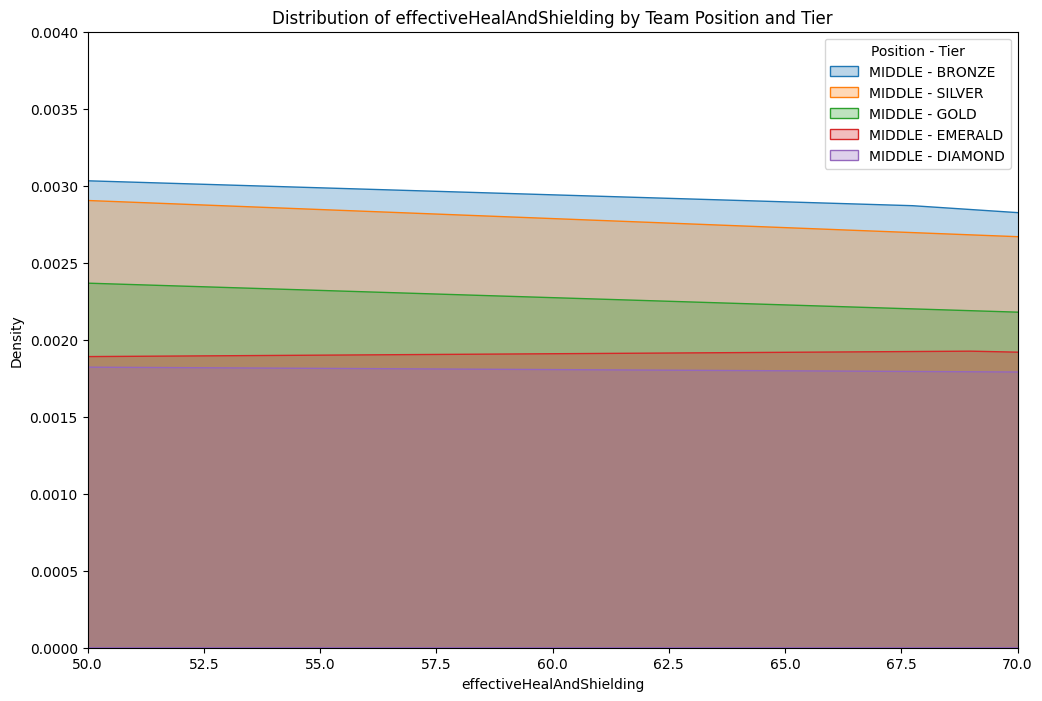

In [234]:
positions = ['MIDDLE']
tiers = ['BRONZE','SILVER','GOLD','EMERALD','DIAMOND']

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['effectiveHealAndShielding'], label=f"{position} - {tier}", fill=True, alpha=0.3)

plt.xlim(50, 70)
plt.ylim(0, 0.004)
plt.xlabel('effectiveHealAndShielding')
plt.ylabel('Density')
plt.title('Distribution of effectiveHealAndShielding by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

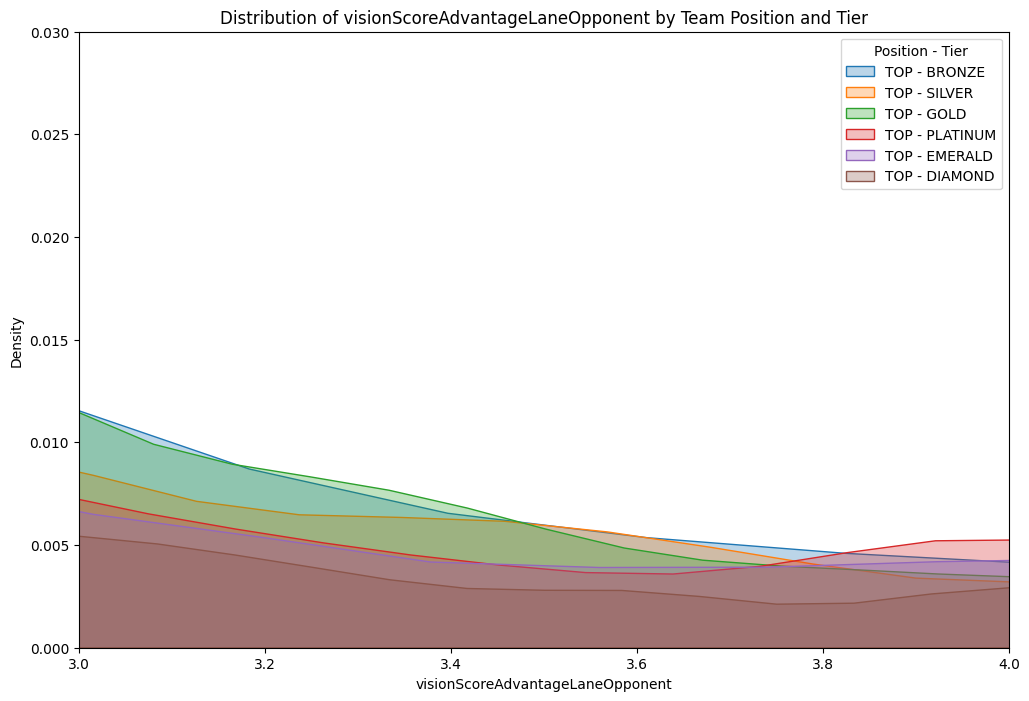

In [235]:
positions = ['TOP']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['visionScoreAdvantageLaneOpponent'], label=f"{position} - {tier}", fill=True, alpha=0.3)
plt.xlim(3, 4)
plt.ylim(0, 0.03)
plt.xlabel('visionScoreAdvantageLaneOpponent')
plt.ylabel('Density')
plt.title('Distribution of visionScoreAdvantageLaneOpponent by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

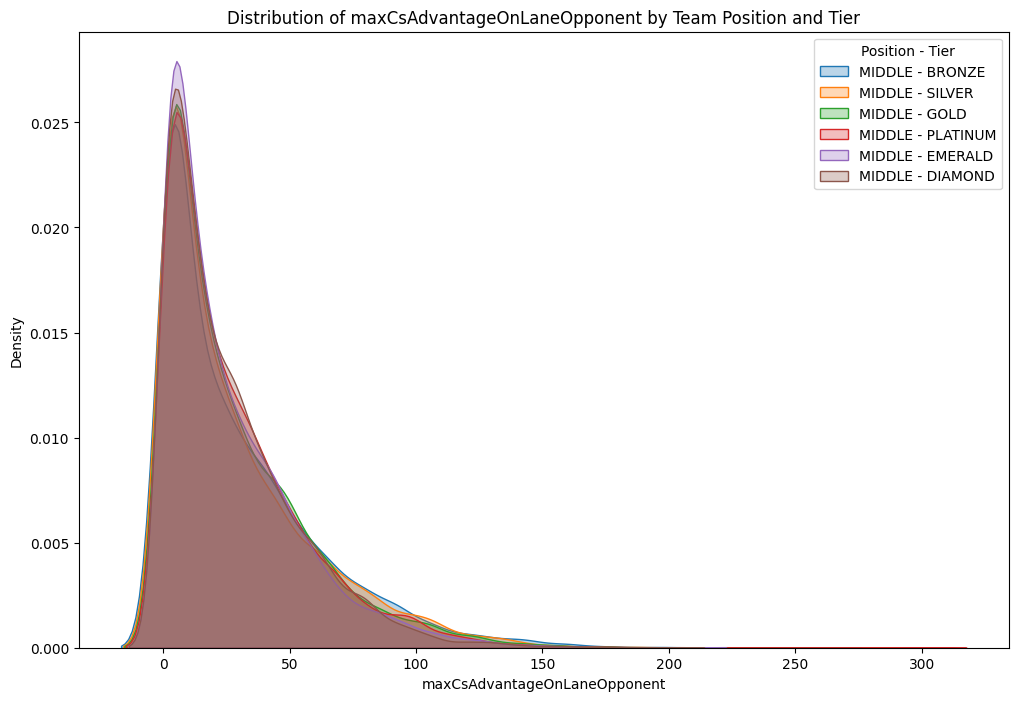

In [236]:
positions = ['MIDDLE']
tiers = df['tier'].unique()

plt.figure(figsize=(12, 8))

for position in positions:
    for tier in tiers:
        subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
        sns.kdeplot(subset['maxCsAdvantageOnLaneOpponent'], label=f"{position} - {tier}", fill=True, alpha=0.3)

plt.xlabel('maxCsAdvantageOnLaneOpponent')
plt.ylabel('Density')
plt.title('Distribution of maxCsAdvantageOnLaneOpponent by Team Position and Tier')
plt.legend(title='Position - Tier')
plt.show()

In [237]:
df.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184434 entries, 0 to 184433
Data columns (total 86 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   champExperience                  184434 non-null  int64
 1   champLevel                       184434 non-null  int64
 2   commandPings                     184434 non-null  int64
 3   consumablesPurchased             184434 non-null  int64
 4   damageDealtToBuildings           184434 non-null  int64
 5   damageDealtToObjectives          184434 non-null  int64
 6   damageDealtToTurrets             184434 non-null  int64
 7   damageSelfMitigated              184434 non-null  int64
 8   deaths                           184434 non-null  int64
 9   detectorWardsPlaced              184434 non-null  int64
 10  doubleKills                      184434 non-null  int64
 11  enemyMissingPings                184434 non-null  int64
 12  enemyVisionPings              

In [238]:
col_float = df.select_dtypes('int64').columns
selected_tiers = ['BRONZE', 'DIAMOND']

for col in col_float:
    plt.figure(figsize=(10, 6))
    for tier in selected_tiers:
        subset = tiers_data[tier]
        sns.histplot(subset[col], bins=30, label=tier, stat="density", element="step")

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col} for selected tiers')
    plt.legend(title='Tier')
    plt.show()
    print(col)

Output hidden; open in https://colab.research.google.com to view.

### int

#### 1. 실질적으로 범주형 골라내기(연속성이 존재하는가)
* champLevel, doubleKills,inhibitorTakedowns, inhibitorsLost, killingSprees, turretPlatesTaken
#### 2. 실질적으로 범주형 골라내기(원-핫 인코딩)
* summoner1~2Id(임베딩 백터 or 가중치 조절)
#### 3. 로그변환 찾기
*
#### 4. 로그변환 필요없음

#### 5. 의미없어보이는 변수
* largestCriticalStrike(로그변환),largestKillingSpree(로그변환), largestMultiKill, longestTimeSpentLiving(로그변환), totalDamageShieldedOnTeammates(로그변환), totalHealsOnTeammates(로그변환), totalTimeCCDealt(로그변환-cc걸린시간동안 데미지?),totalUnitsHealed(로그변환도 소용없을듯 무슨 변수인지 확인해야함),trueDamageDealt(데미지는 겹치는 변수가 너무 많음 분포도 의미없어보임)(trueDamageDealtToChampions,trueDamageTaken 사이에서 적절하게 선별),wardsGuarded

#### 6. 따로 확인해야하는 변수
* magicDamageDealt, nexusLost+win(총 3 안잃고 이겼다,잃고 졌다. 안잃고 졌다.), spell(1~4)Casts(스케일링 구간통일 + 로그변환), totalDamageDealt, needVisionPings(로그변환 격차가??),  pushPings(영향력 측정 - 로그변환),laneMinionsFirst10Minutes

#### 7. 쌍봉형
* neutralMinionsKilled(중립 몬스터? ), totalMinionsKilled

In [239]:
## 삭제 :  'largestKillingSpree','largestMultiKill','longestTimeSpentLiving','wardsGuarded','doubleKills','inhibitorTakedowns','killingSprees','turretPlatesTaken','totalUnitsHealed','totalHealsOnTeammates','totalDamageShieldedOnTeammates', 'trueDamageDealt', 'trueDamageTaken', 'trueDamageDealtToChampions' 고정피해 지표들 전부 삭제

In [240]:
df['wardsGuarded'].groupby(df['tier']).value_counts()

tier      wardsGuarded
BRONZE    0               22537
          1                5426
          2                1096
          3                 196
          4                  45
          5                   5
DIAMOND   0               21857
          1                6418
          2                1559
          3                 409
          4                 100
          5                  24
          6                   7
          7                   1
          8                   1
          9                   1
EMERALD   0               23265
          1                6883
          2                1692
          3                 406
          4                 110
          5                  36
          6                   5
          7                   2
GOLD      0               22100
          1                6182
          2                1458
          3                 289
          4                  65
          5                  16
          6                   5
          7                   1
PLATINUM  0               22347
          1                6396
          2                1590
          3                 347
          4                  96
          5                  18
          6                   7
          7                   2
SILVER    0               23568
          1                6186
          2                1327
          3                 285
          4                  53
          5                  14
          6                   1
Name: count, dtype: int64

In [241]:
df['totalUnitsHealed'].groupby(df['tier']).sum()

,totalUnitsHealed
tier,
BRONZE,42878
DIAMOND,48548
EMERALD,50311
GOLD,46642
PLATINUM,46166
SILVER,46013


In [242]:
df['turretPlatesTaken'].groupby([df['tier'],df['teamPosition']]).sum()

tier      teamPosition
BRONZE    BOTTOM          11101
          JUNGLE           1024
          MIDDLE           8737
          TOP             11889
          UTILITY          7838
DIAMOND   BOTTOM          12039
          JUNGLE           1836
          MIDDLE           9306
          TOP             13120
          UTILITY          7108
EMERALD   BOTTOM          14417
          JUNGLE           1748
          MIDDLE           9103
          TOP             12559
          UTILITY          8060
GOLD      BOTTOM          12606
          JUNGLE           1261
          MIDDLE           8150
          TOP             10845
          UTILITY          9401
PLATINUM  BOTTOM          12836
          JUNGLE           1575
          MIDDLE           8391
          TOP             11580
          UTILITY          8253
SILVER    BOTTOM          14231
          JUNGLE           1346
          MIDDLE           9293
          TOP             11361
          UTILITY          8327
Name: turretPlatesTaken, dtype: int64

pushPings


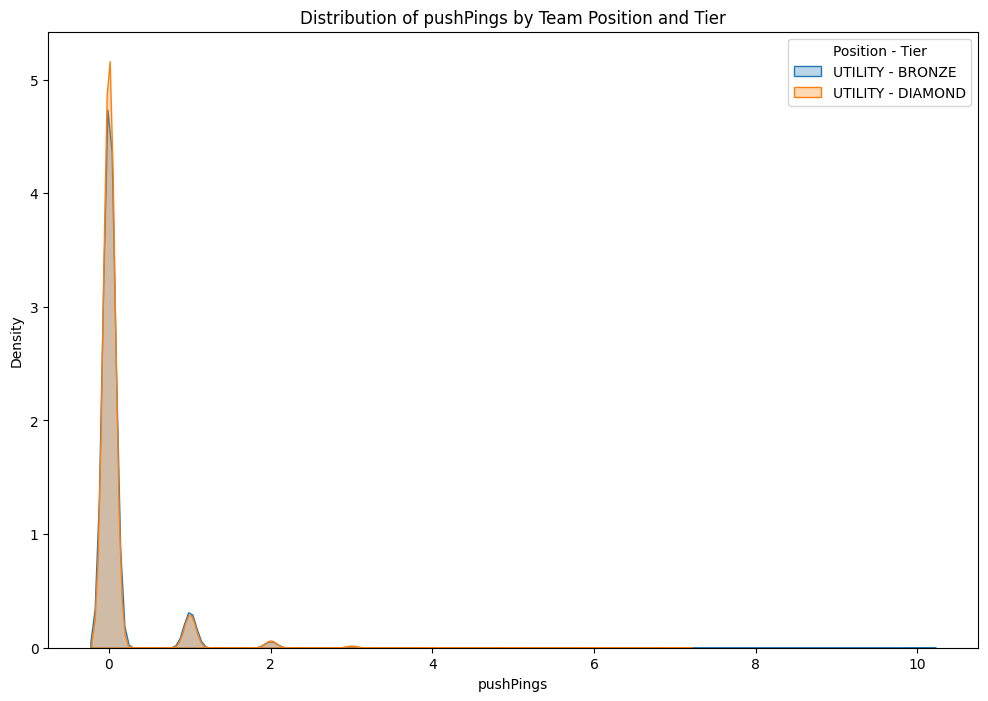

needVisionPings


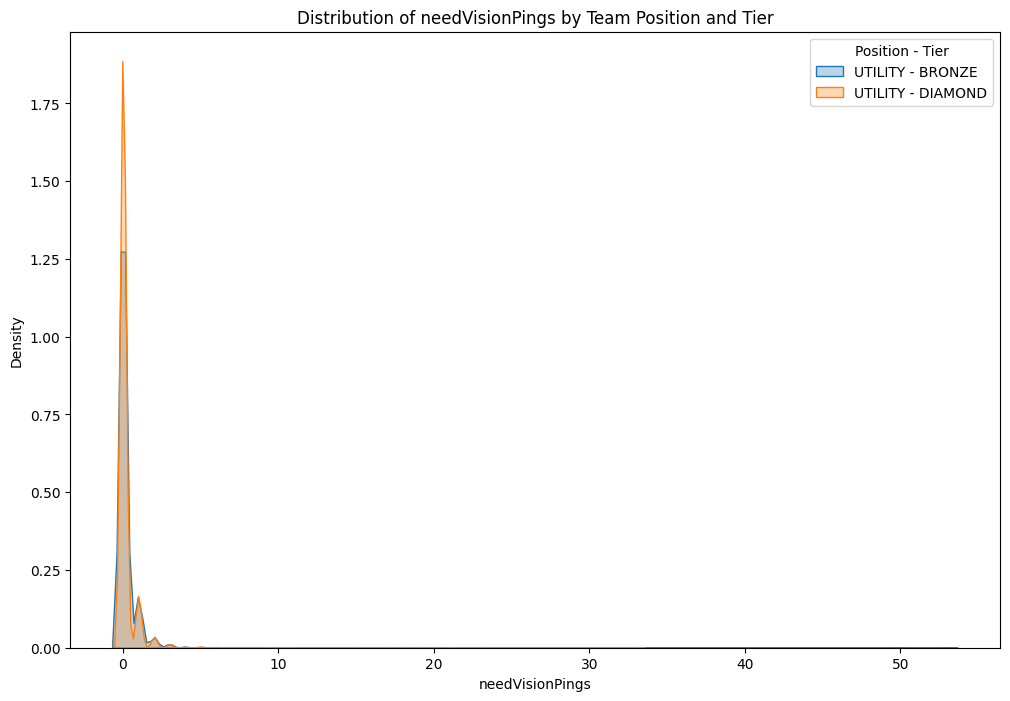

wardsGuarded


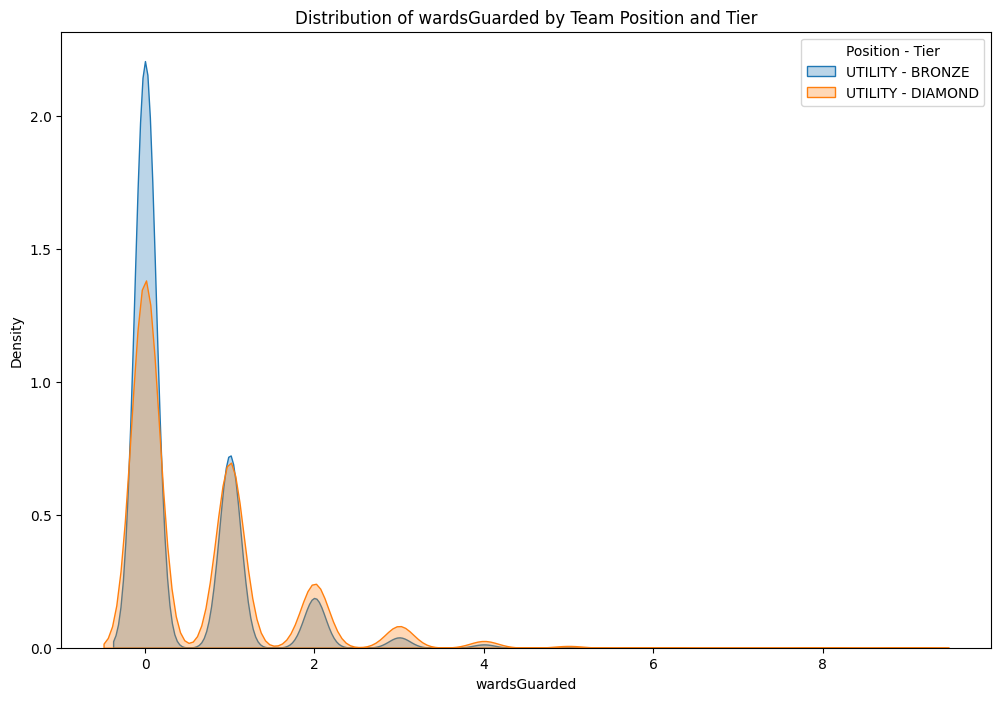

trueDamageDealtToChampions


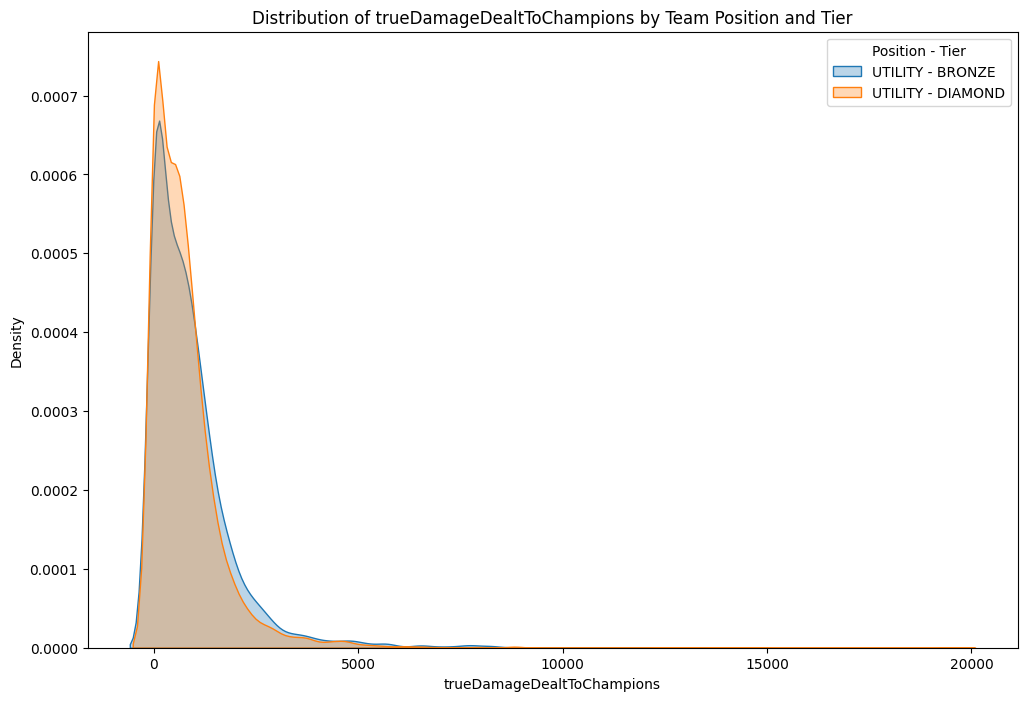

trueDamageTaken


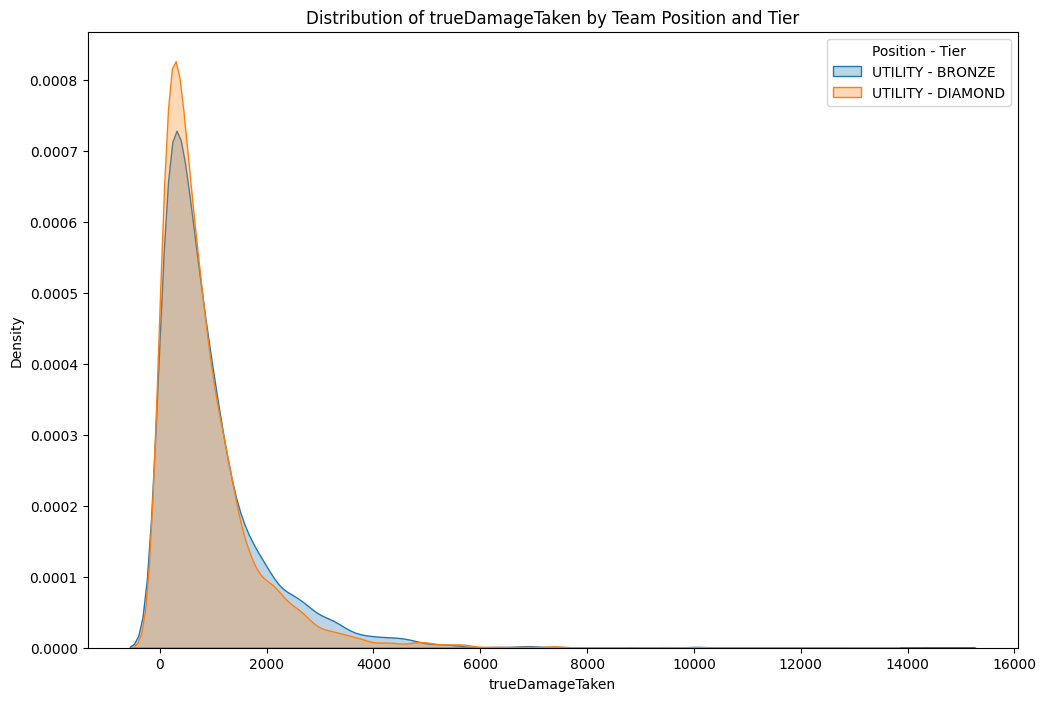

trueDamageDealt


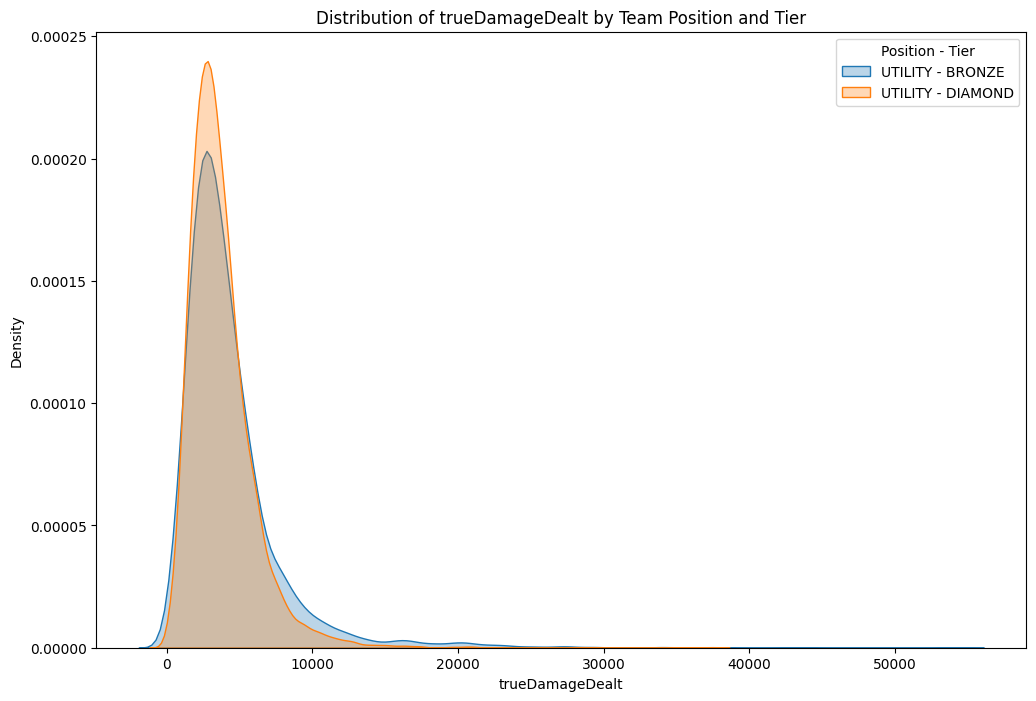

totalUnitsHealed


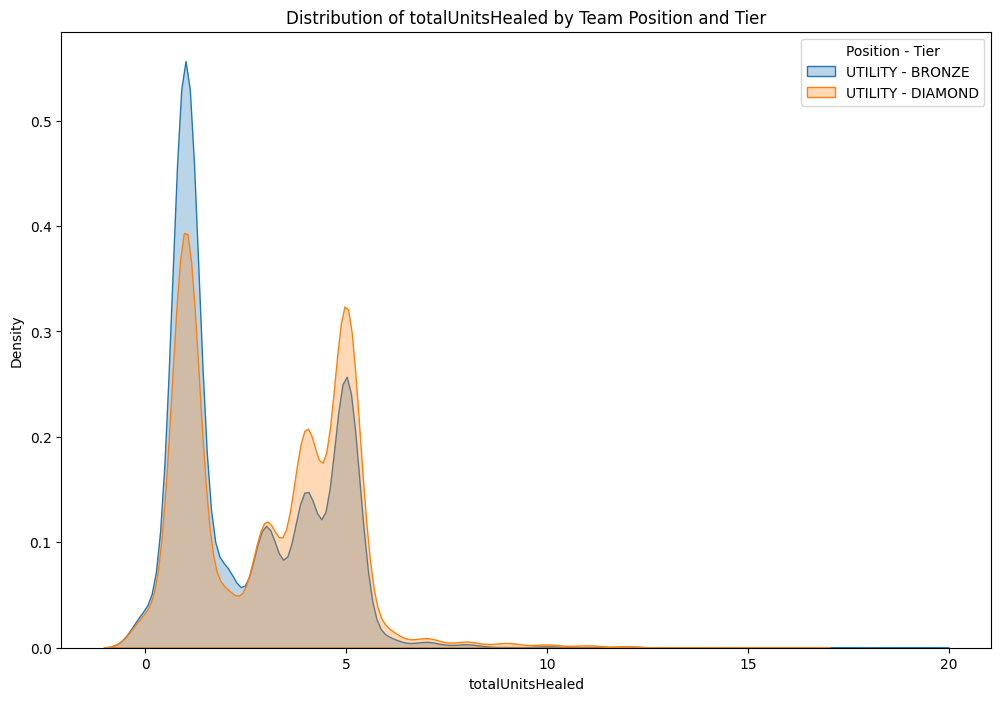

totalTimeCCDealt


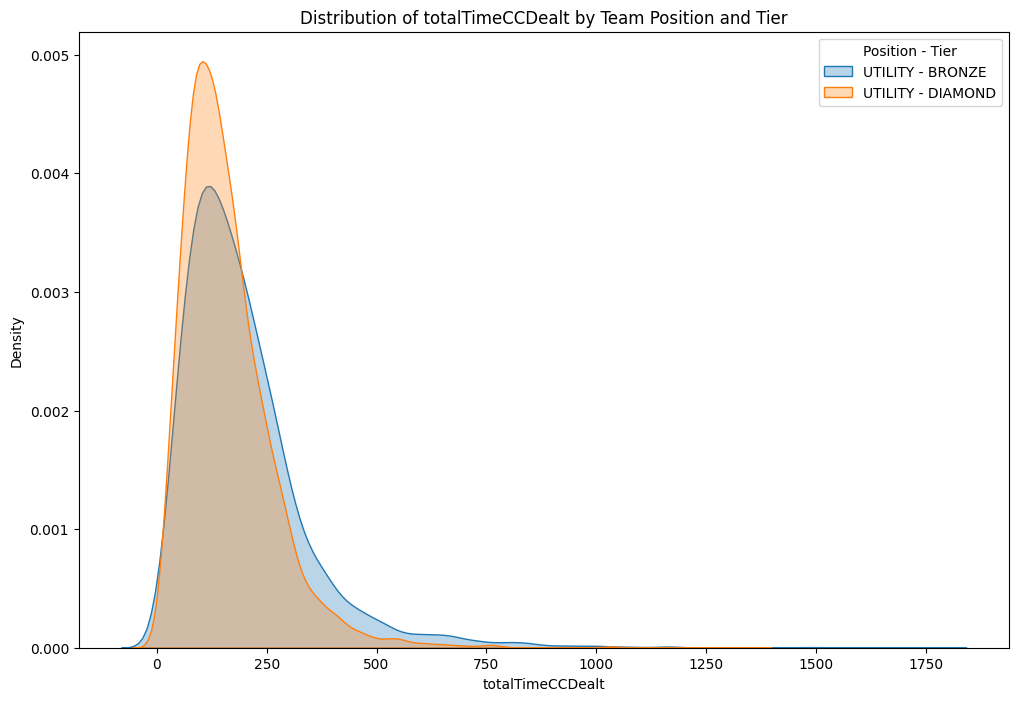

totalHealsOnTeammates


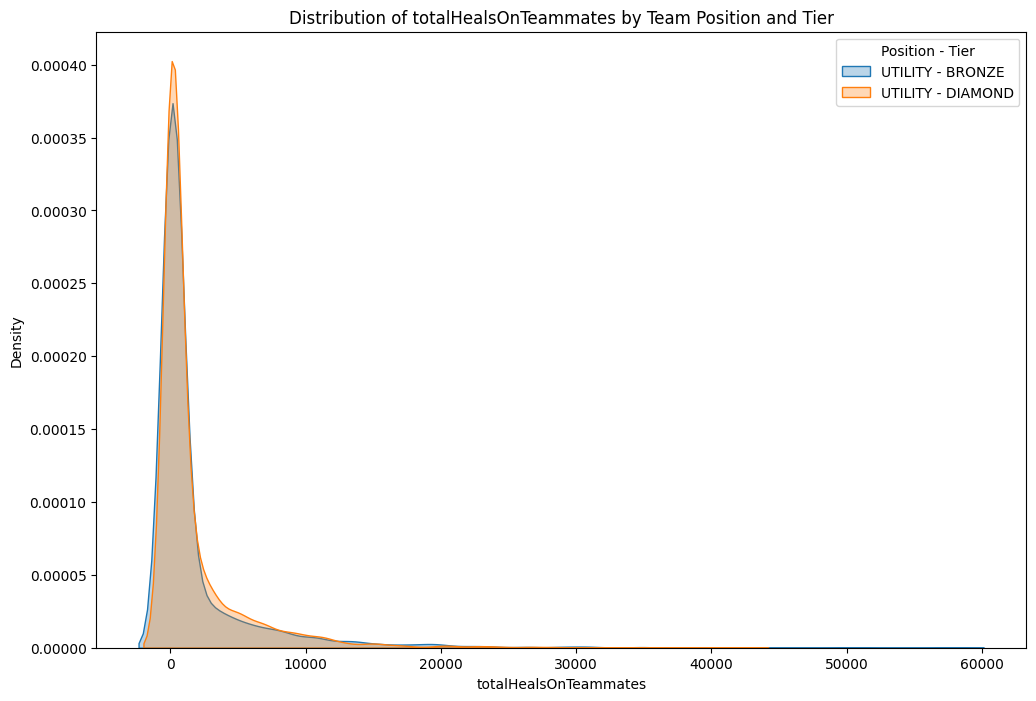

totalDamageShieldedOnTeammates


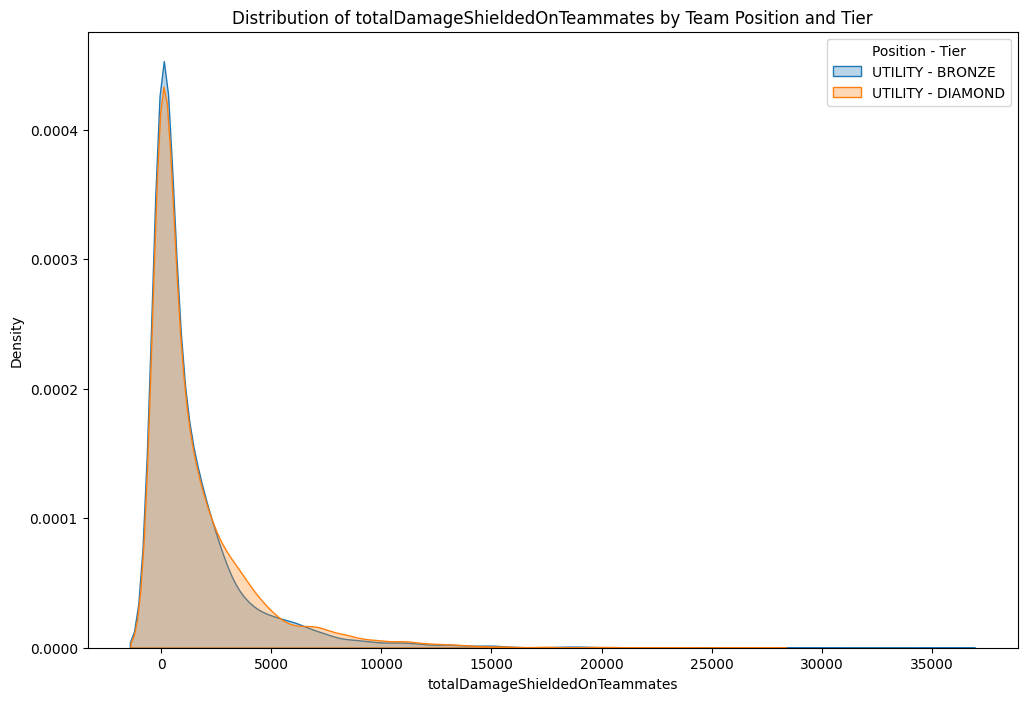

longestTimeSpentLiving


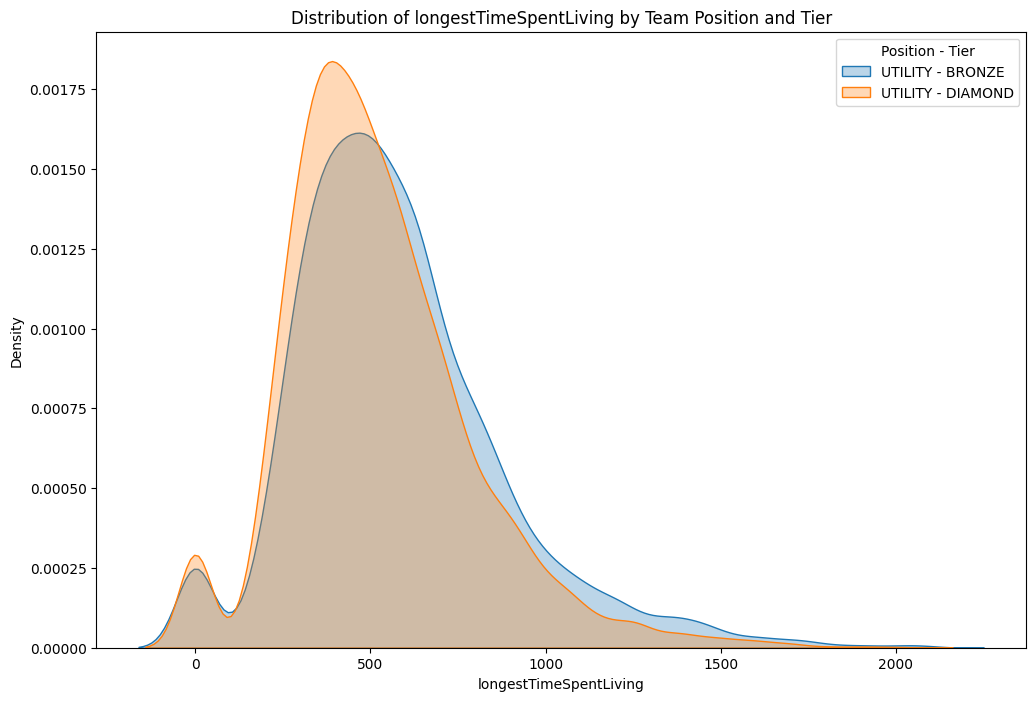

largestMultiKill


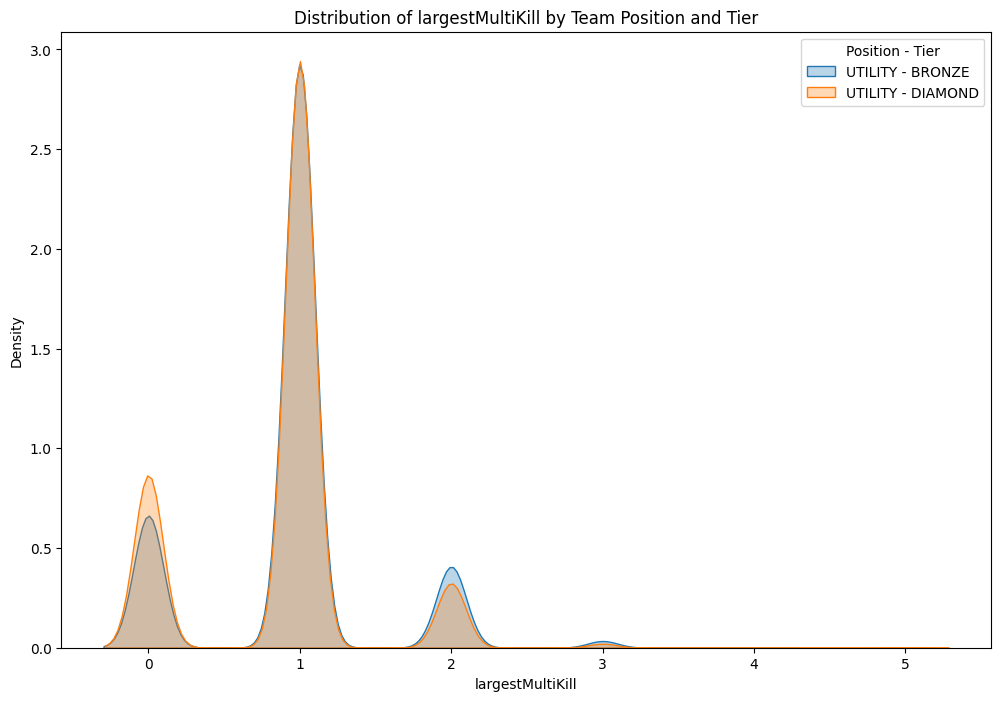

largestKillingSpree


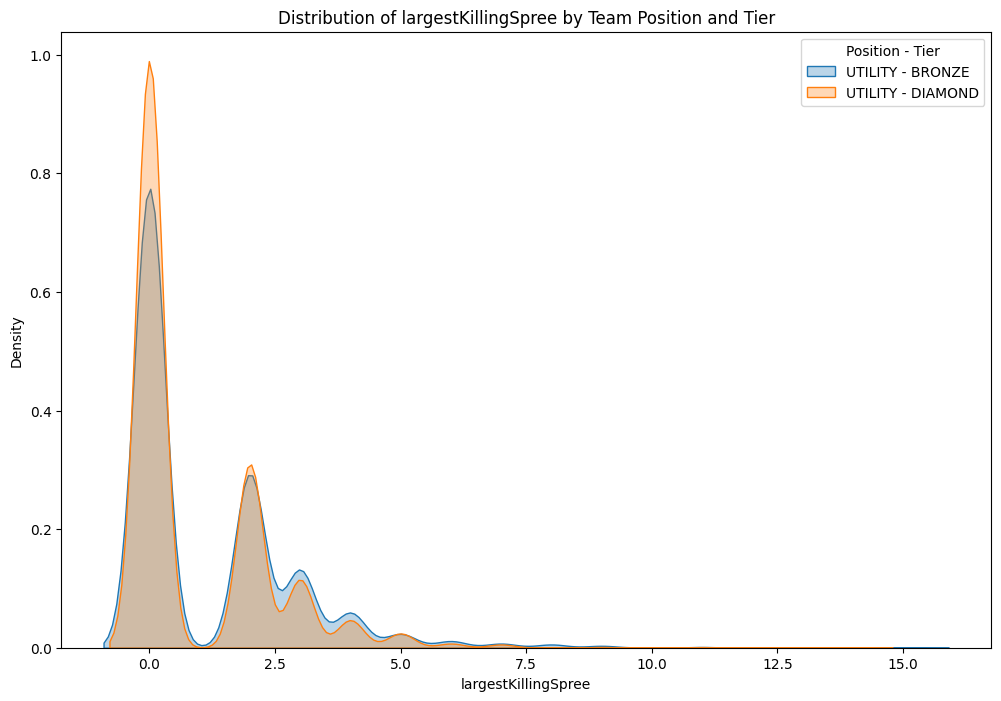

largestCriticalStrike


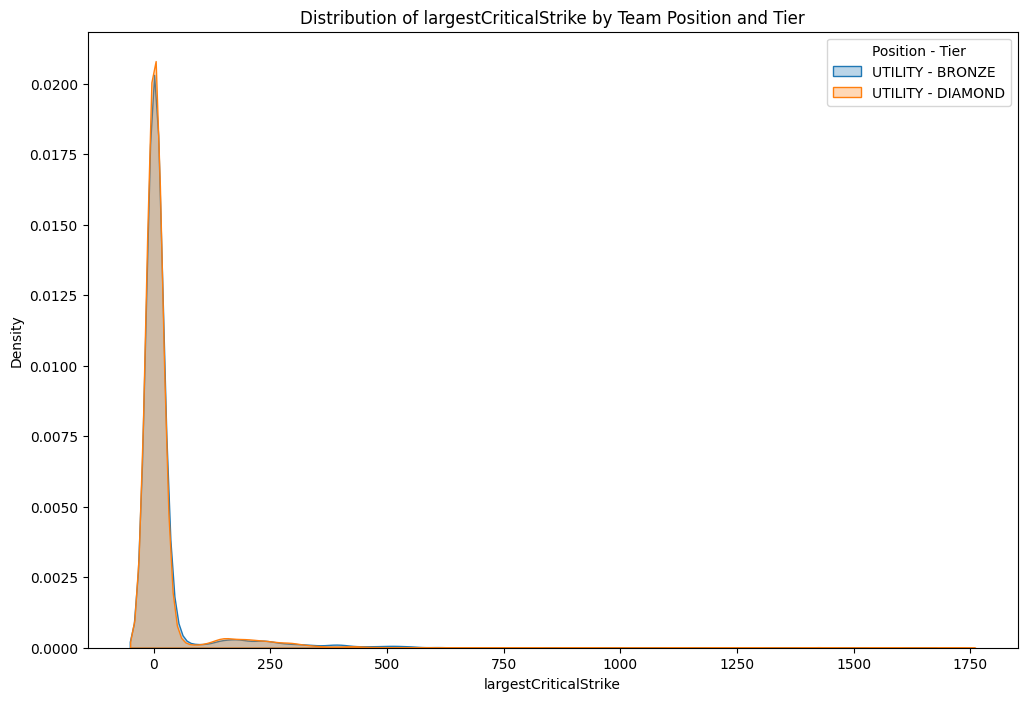

champLevel


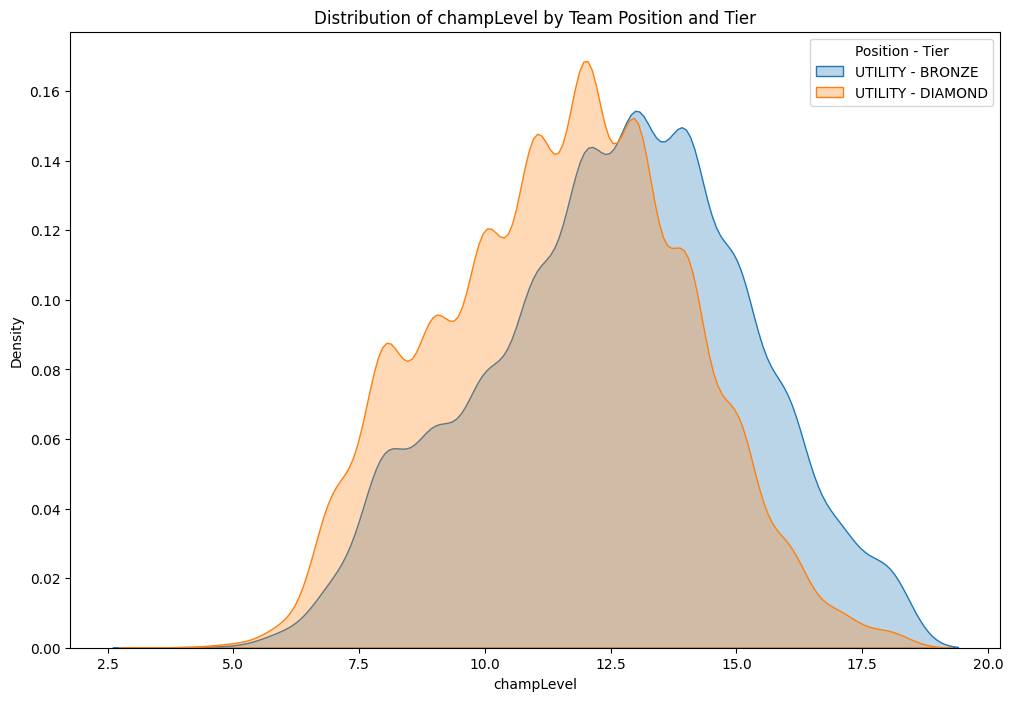

doubleKills


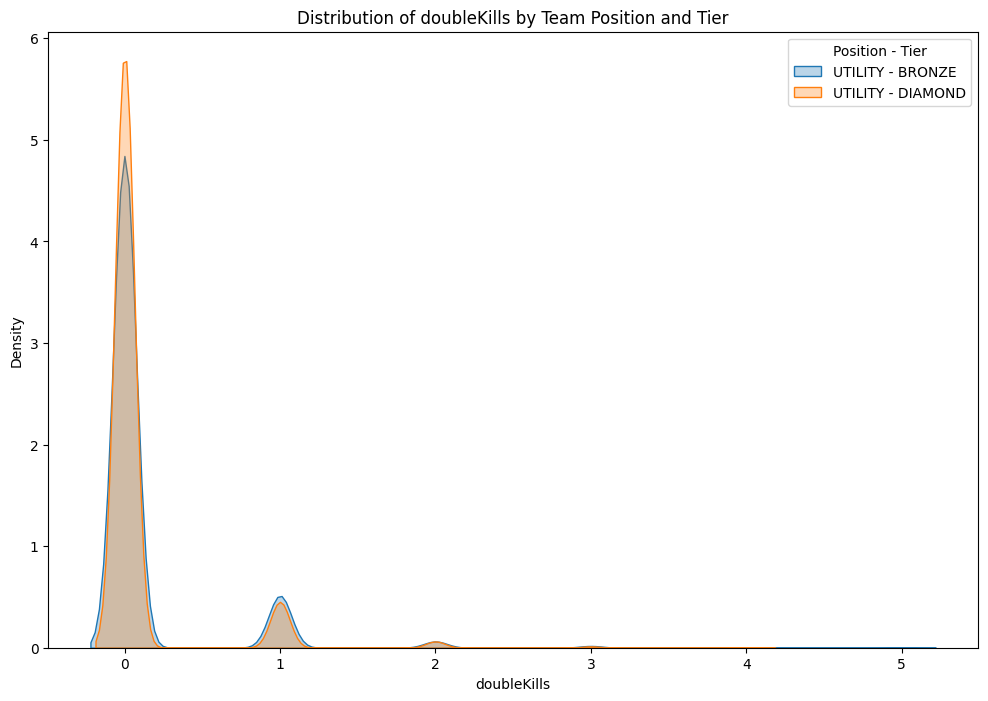

inhibitorTakedowns


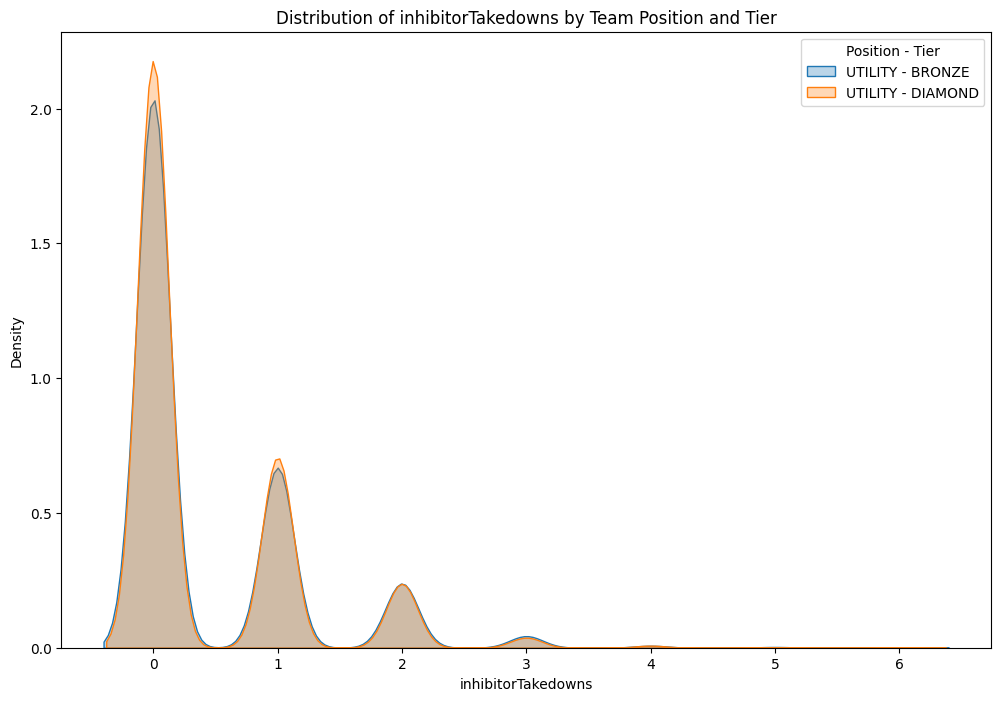

inhibitorsLost


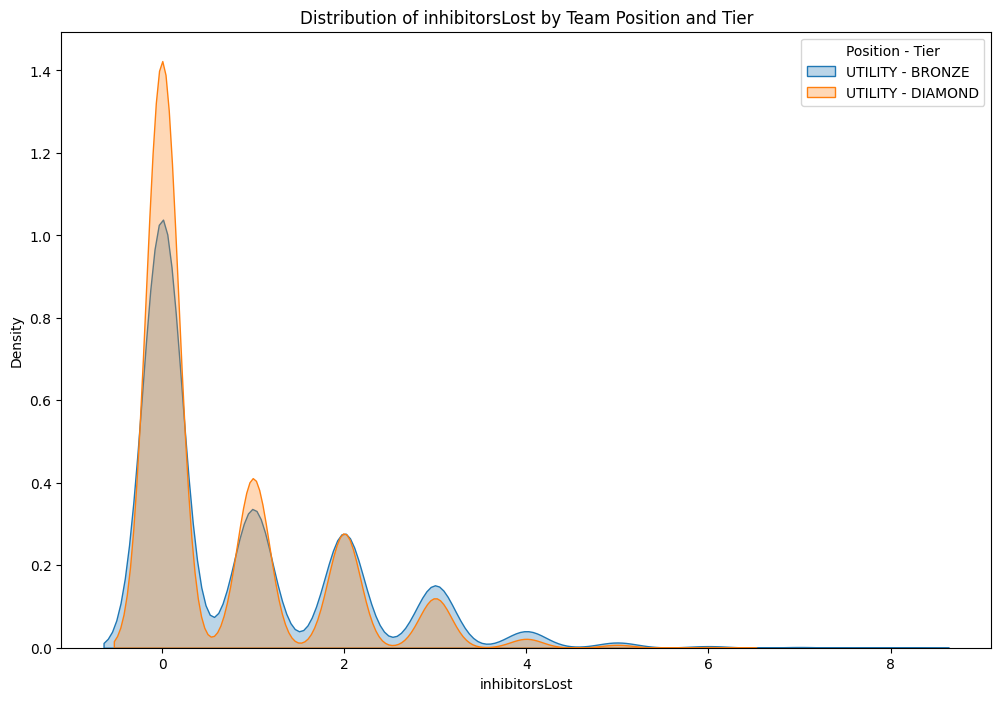

killingSprees


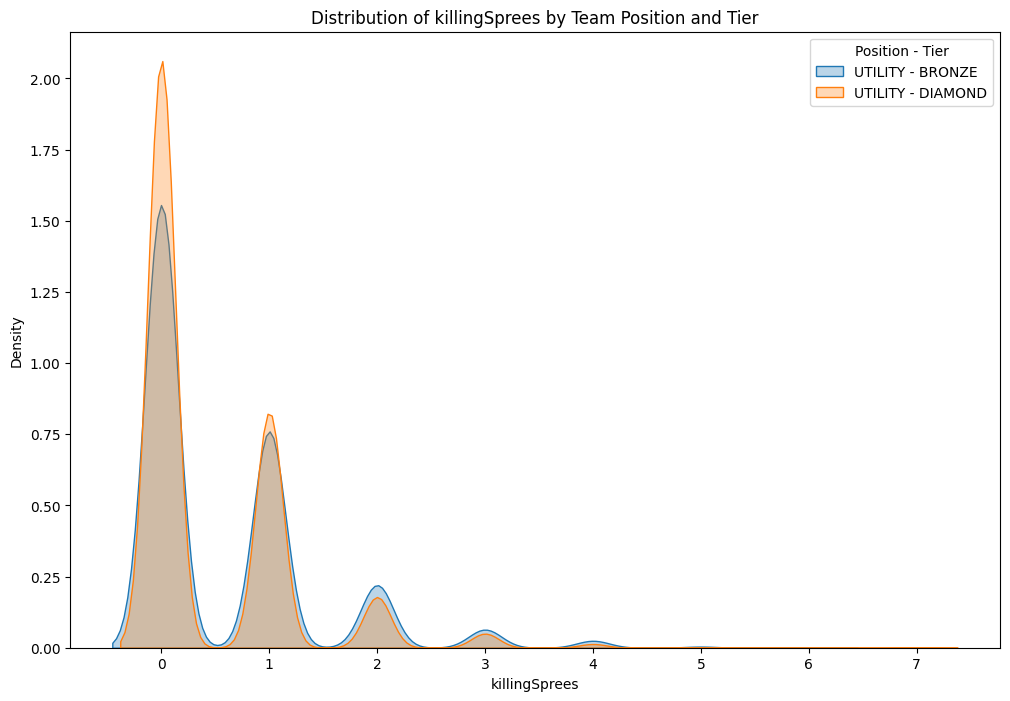

turretPlatesTaken


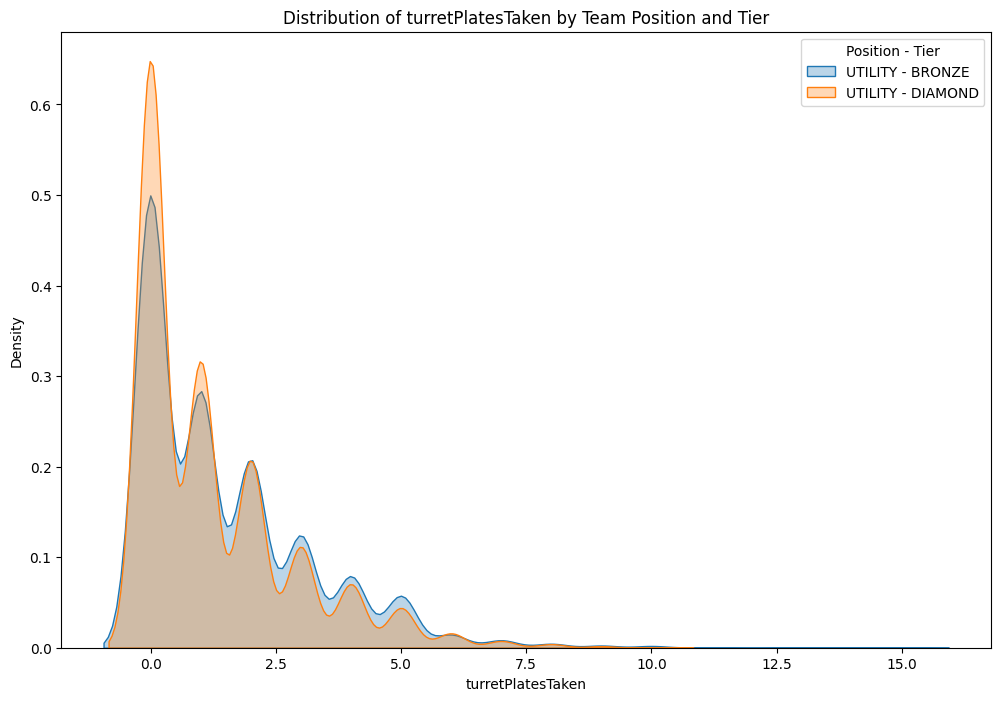

In [243]:
columns_to_plot = [
    'pushPings', 'needVisionPings', 'wardsGuarded', 'trueDamageDealtToChampions',
    'trueDamageTaken', 'trueDamageDealt', 'totalUnitsHealed', 'totalTimeCCDealt',
    'totalHealsOnTeammates', 'totalDamageShieldedOnTeammates', 'longestTimeSpentLiving',
    'largestMultiKill', 'largestKillingSpree', 'largestCriticalStrike', 'champLevel',
    'doubleKills', 'inhibitorTakedowns', 'inhibitorsLost', 'killingSprees', 'turretPlatesTaken'
]

positions = ['UTILITY']
tiers = ['BRONZE', 'DIAMOND']

# 각 변수에 대해 KDE 플롯 그리기
for col in columns_to_plot:
    plt.figure(figsize=(12, 8))
    for position in positions:
        for tier in tiers:
            subset = df[(df['teamPosition'] == position) & (df['tier'] == tier)]
            sns.kdeplot(subset[col], label=f"{position} - {tier}", fill=True, alpha=0.3)
    print(col)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col} by Team Position and Tier')
    plt.legend(title='Position - Tier')
    plt.show()

In [244]:
df = df.drop(columns=['largestKillingSpree','largestMultiKill','longestTimeSpentLiving','wardsGuarded','doubleKills','inhibitorTakedowns','killingSprees','turretPlatesTaken','totalUnitsHealed','totalHealsOnTeammates','totalDamageShieldedOnTeammates', 'trueDamageDealt', 'trueDamageTaken', 'trueDamageDealtToChampions'])

In [245]:
df.shape

(184434, 87)

* 게임 시간 분단위로 변경

In [246]:
df['gameLength'] = (df['gameLength']/60).round(2)

* nexusLost & win 변수를 총 3개의 열로 원-핫 인코딩(안잃고 이겼다,잃고 졌다, 안잃고 졌다.)

In [247]:
df['win'].value_counts()

,count
win,
1,95647
0,88787


In [248]:
df['win_1_nexusLost_0'] = np.where((df['win'] == 1) & (df['nexusLost'] == 0),1,0)
df['win_0_nexusLost_1'] = np.where((df['win'] == 0) & (df['nexusLost'] == 1),1,0)
df['win_0_nexusLost_0'] = np.where((df['win'] == 0) & (df['nexusLost'] == 0),1,0)

In [249]:
df['win_1_nexusLost_0'].value_counts()

,count
win_1_nexusLost_0,
1,95647
0,88787


In [250]:
df['win_0_nexusLost_0'].value_counts()

,count
win_0_nexusLost_0,
0,150408
1,34026


In [251]:
df['win_0_nexusLost_1'].value_counts()

,count
win_0_nexusLost_1,
0,129673
1,54761


In [252]:
df = df.drop(columns=['win','nexusLost'])

In [253]:
df.shape

(184434, 88)

* killParticipation가 0인 값 확인

In [254]:
df = df[df['killParticipation']!=0]

In [255]:
df.shape

(182760, 88)

In [256]:
df['summoner1Id'].value_counts()

,count
summoner1Id,
12,46312
4,38815
11,29166
14,24533
21,23066
7,7818
6,4414
3,4165
1,3888


In [257]:
df['summoner2Id'].value_counts()

,count
summoner2Id,
4,134085
12,14756
14,8638
11,8304
21,6126
6,4681
7,2651
3,2251
1,1125


In [258]:
df = df[~df['summoner1Id'].isin([54, 55])]

In [259]:
df = df[~df['summoner2Id'].isin([54, 55])]

In [260]:
df.shape

(182034, 88)

* summoner1~2ld

* 1: Barrier (방어막) - 일정 시간 동안 피해를 흡수하는 방어막을 생성.
* 3: Exhaust (탈진) - 대상의 이동 속도와 공격 속도를 감소시키고 받는 피해를 감소시킴.
* 4: Flash (점멸) - 짧은 거리만큼 순간 이동하는 주문.
* 6: Ghost (유령) - 이동 속도를 크게 증가시키는 주문.
* 7: Heal (회복) - 사용자와 근처의 아군 챔피언의 체력을 회복하고, 이동 속도를 잠시 증가시킴.
* 11: Smite (강타) - 정글 몬스터나 소환물을 공격하며 추가 피해를 입히는 정글 전용 주문.
* 12: Teleport (순간이동) - 맵 내의 아군 구조물이나 미니언, 와드 등으로 순간 이동.
* 14: Ignite (점화) - 일정 시간 동안 대상에게 지속 피해를 입히고 치유량을 감소시키는 주문.
* 21: Barrier (방어막) - 일정 시간 동안 피해를 흡수하는 방어막을 생성.
* 54: Placeholder (플레이스홀더) - 사용되지 않는 소환사 주문 ID.
* 55: Placeholder (플레이스홀더) - 사용되지 않는 소환사 주문 ID.

In [261]:
df['summoner1Id'] = df['summoner1Id'].apply(lambda x : 'Barrier' if x in [1,21] else
                                            'Exhaust' if x == 3 else
                                            'Flash' if x == 4 else
                                            'Ghost' if x == 6 else
                                            'Heal' if x == 7 else
                                            'Smite' if x == 11 else
                                            'Teleport' if x == 12 else 'Ignite')

<ipython-input-261-b66b9c5cee10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summoner1Id'] = df['summoner1Id'].apply(lambda x : 'Barrier' if x in [1,21] else


In [262]:
df['summoner2Id'] = df['summoner2Id'].apply(lambda x : 'Barrier' if x in [1,21] else
                                            'Exhaust' if x == 3 else
                                            'Flash' if x == 4 else
                                            'Ghost' if x == 6 else
                                            'Heal' if x == 7 else
                                            'Smite' if x == 11 else
                                            'Teleport' if x == 12 else 'Ignite')

In [263]:
df['summoner1Id'].unique()

array(['Teleport', 'Ignite', 'Smite', 'Heal', 'Barrier', 'Exhaust',
       'Ghost', 'Flash'], dtype=object)

In [264]:
types = ['Flash', 'Teleport', 'Barrier', 'Smite', 'Heal', 'Ignite', 'Ghost','Exhaust']

for t in types:
    df[t] = ((df["summoner1Id"] == t) | (df["summoner2Id"] == t)).astype(int)

df[[["summoner1Id", "summoner2Id"] + types][0]].head()

,summoner1Id,summoner2Id,Flash,Teleport,Barrier,Smite,Heal,Ignite,Ghost,Exhaust
0,Teleport,Flash,1,1,0,0,0,0,0,0
1,Ignite,Flash,1,0,0,0,0,1,0,0
2,Ignite,Flash,1,0,0,0,0,1,0,0
3,Ignite,Flash,1,0,0,0,0,1,0,0
4,Ignite,Flash,1,0,0,0,0,1,0,0


In [265]:
df.shape

(182034, 96)

In [266]:
df[df['Flash']==1]

,tier,champExperience,champLevel,championName,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,win_0_nexusLost_1,win_0_nexusLost_0,Flash,Teleport,Barrier,Smite,Heal,Ignite,Ghost,Exhaust
0,BRONZE,14444,15,Poppy,2,4,1291,1396,1291,37543,...,1,0,1,1,0,0,0,0,0,0
1,BRONZE,7904,11,Braum,2,6,0,0,0,19919,...,1,0,1,0,0,0,0,1,0,0
2,BRONZE,12153,14,Morgana,1,10,1515,1922,1515,14613,...,1,0,1,0,0,0,0,1,0,0
3,BRONZE,8014,11,Thresh,3,5,1420,2703,1420,13896,...,0,0,1,0,0,0,0,1,0,0
4,BRONZE,11402,13,Ziggs,1,6,530,951,530,12118,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184429,EMERALD,12779,14,Neeko,4,3,662,14936,662,14493,...,1,0,1,0,0,1,0,0,0,0
184430,EMERALD,17121,17,LeeSin,4,9,1091,39220,1091,58609,...,1,0,1,0,0,1,0,0,0,0
184431,EMERALD,10056,13,Rell,7,10,1042,5185,1042,38927,...,1,0,1,0,0,0,0,1,0,0
184432,EMERALD,13001,14,Nautilus,3,10,990,5934,990,35432,...,0,0,1,0,0,0,0,1,0,0


In [267]:
df.loc[(df['Flash']!=1)&(df['Ghost']!=1)&((df['Teleport']!=1)&(df['Smite']!=1)&(df['Ignite']!=1)&(df['Exhaust']!=1))]

,tier,champExperience,champLevel,championName,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,win_0_nexusLost_1,win_0_nexusLost_0,Flash,Teleport,Barrier,Smite,Heal,Ignite,Ghost,Exhaust
112608,GOLD,10043,13,Yuumi,12,5,408,464,408,8867,...,1,0,0,0,1,0,1,0,0,0
180911,EMERALD,13471,15,Evelynn,39,10,2210,2210,2210,40422,...,0,0,0,0,1,0,1,0,0,0


In [268]:
df.loc[((df['Flash'] == 1) & (df['Ghost'] == 1)) |
       ((df['Flash'] == 1) & (df['Teleport'] == 1)) |
       ((df['Flash'] == 1) & (df['Smite'] == 1)) |
       ((df['Flash'] == 1) & (df['Ignite'] == 1)) |
       ((df['Flash'] == 1) & (df['Exhaust'] == 1)) |
       ((df['Ghost'] == 1) & (df['Teleport'] == 1)) |
       ((df['Ghost'] == 1) & (df['Smite'] == 1)) |
       ((df['Ghost'] == 1) & (df['Ignite'] == 1)) |
       ((df['Ghost'] == 1) & (df['Exhaust'] == 1)) |
       ((df['Teleport'] == 1) & (df['Smite'] == 1)) |
       ((df['Teleport'] == 1) & (df['Ignite'] == 1)) |
       ((df['Teleport'] == 1) & (df['Exhaust'] == 1)) |
       ((df['Smite'] == 1) & (df['Ignite'] == 1)) |
       ((df['Smite'] == 1) & (df['Exhaust'] == 1)) |
       ((df['Ignite'] == 1) & (df['Exhaust'] == 1))]

,tier,champExperience,champLevel,championName,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,win_0_nexusLost_1,win_0_nexusLost_0,Flash,Teleport,Barrier,Smite,Heal,Ignite,Ghost,Exhaust
0,BRONZE,14444,15,Poppy,2,4,1291,1396,1291,37543,...,1,0,1,1,0,0,0,0,0,0
1,BRONZE,7904,11,Braum,2,6,0,0,0,19919,...,1,0,1,0,0,0,0,1,0,0
2,BRONZE,12153,14,Morgana,1,10,1515,1922,1515,14613,...,1,0,1,0,0,0,0,1,0,0
3,BRONZE,8014,11,Thresh,3,5,1420,2703,1420,13896,...,0,0,1,0,0,0,0,1,0,0
4,BRONZE,11402,13,Ziggs,1,6,530,951,530,12118,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184429,EMERALD,12779,14,Neeko,4,3,662,14936,662,14493,...,1,0,1,0,0,1,0,0,0,0
184430,EMERALD,17121,17,LeeSin,4,9,1091,39220,1091,58609,...,1,0,1,0,0,1,0,0,0,0
184431,EMERALD,10056,13,Rell,7,10,1042,5185,1042,38927,...,1,0,1,0,0,0,0,1,0,0
184432,EMERALD,13001,14,Nautilus,3,10,990,5934,990,35432,...,0,0,1,0,0,0,0,1,0,0


* 극단값 삭제 + 스케일링 확인
* 분포 log 변경

In [191]:
df.select_dtypes('int64').columns

Index(['champExperience', 'champLevel', 'commandPings', 'consumablesPurchased',
       'damageDealtToBuildings', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'damageSelfMitigated', 'deaths',
       'detectorWardsPlaced', 'enemyMissingPings', 'enemyVisionPings',
       'getBackPings', 'goldEarned', 'goldSpent', 'inhibitorsLost',
       'itemsPurchased', 'kills', 'largestCriticalStrike', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken', 'needVisionPings',
       'onMyWayPings', 'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'pushPings', 'spell1Casts', 'spell2Casts',
       'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner2Casts',
       'summonerLevel', 'timeCCingOthers', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalTimeCCDealt', 'totalTimeSpentDead', 'visionScore',
       'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'allInPings',

In [190]:
df.select_dtypes('int64').info()

<class 'pandas.core.frame.DataFrame'>
Index: 182034 entries, 0 to 184433
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   champExperience                  182034 non-null  int64
 1   champLevel                       182034 non-null  int64
 2   commandPings                     182034 non-null  int64
 3   consumablesPurchased             182034 non-null  int64
 4   damageDealtToBuildings           182034 non-null  int64
 5   damageDealtToObjectives          182034 non-null  int64
 6   damageDealtToTurrets             182034 non-null  int64
 7   damageSelfMitigated              182034 non-null  int64
 8   deaths                           182034 non-null  int64
 9   detectorWardsPlaced              182034 non-null  int64
 10  enemyMissingPings                182034 non-null  int64
 11  enemyVisionPings                 182034 non-null  int64
 12  getBackPings                     18

In [192]:
col1_int = ['champExperience', 'champLevel', 'commandPings', 'consumablesPurchased',
       'damageDealtToBuildings', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'damageSelfMitigated', 'deaths',
       'detectorWardsPlaced', 'enemyMissingPings', 'enemyVisionPings',
       'getBackPings', 'goldEarned', 'goldSpent', 'inhibitorsLost']

In [196]:
df[col1_int].describe()

,champExperience,champLevel,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,deaths,detectorWardsPlaced,enemyMissingPings,enemyVisionPings,getBackPings,goldEarned,goldSpent,inhibitorsLost
count,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000,182034.000000
mean,12850.224167,14.041091,7.104579,4.557297,3167.583138,11419.664920,3167.583138,20542.394536,5.496171,2.254288,4.809041,1.916829,3.311590,10942.612094,10064.081858,0.782337
std,4578.460804,2.709268,8.749785,3.378983,3488.978820,13047.535316,3488.978820,17808.271752,3.167646,2.680415,5.911319,3.610498,5.514606,3780.916812,3674.291599,1.119258
min,1527.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,500.000000,0.000000
25%,9465.000000,12.000000,1.000000,2.000000,497.000000,2294.000000,497.000000,8891.250000,3.000000,0.000000,1.000000,0.000000,0.000000,8115.000000,7375.000000,0.000000
50%,12645.000000,14.000000,4.000000,4.000000,2081.000000,6514.000000,2081.000000,15242.000000,5.000000,1.000000,3.000000,0.000000,1.000000,10660.000000,9750.000000,0.000000
75%,15864.000000,16.000000,10.000000,6.000000,4697.000000,15791.750000,4697.000000,26462.750000,8.000000,3.000000,7.000000,2.000000,4.000000,13419.000000,12350.000000,1.000000
max,46574.000000,18.000000,163.000000,44.000000,31959.000000,117330.000000,31959.000000,295698.000000,30.000000,32.000000,103.000000,54.000000,96.000000,33923.000000,56908.000000,14.000000


In [198]:
df['summoner1Casts'].value_counts()

,count
summoner1Casts,
4,35990
3,34932
5,26281
2,21381
6,15417
7,8001
1,5126
8,4179
15,2674


In [ ]:
col2_int = ['itemsPurchased', 'kills', 'largestCriticalStrike', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken', 'needVisionPings',
       'onMyWayPings', 'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'pushPings', 'spell1Casts', 'spell2Casts',
       'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner2Casts',
       'summonerLevel', 'timeCCingOthers', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'totalHeal',
       'totalTimeCCDealt', 'totalTimeSpentDead', 'visionScore',
       'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'allInPings',
       'assistMePings', 'assists', 'bountyLevel', 'controlWardsPlaced',
       'deathsByEnemyChamps', 'dodgeSkillShotsSmallWindow',
       'enemyChampionImmobilizations', 'fullTeamTakedown',
       'immobilizeAndKillWithAlly', 'killAfterHiddenWithAlly',
       'landSkillShotsEarlyGame', 'maxKillDeficit', 'outnumberedKills',
       'skillshotsDodged', 'skillshotsHit', 'soloKills', 'stealthWardsPlaced',
       'survivedThreeImmobilizesInFight', 'wardTakedowns',
       'wardTakedownsBefore20M']

* 챔피언

In [44]:
df['championName'].unique()

array(['Poppy', 'Braum', 'Morgana', 'Thresh', 'Ziggs', 'Taric', 'Lillia',
       'Viego', 'Seraphine', 'MissFortune', 'Samira', 'Xayah', 'Ahri',
       'Nocturne', 'Zyra', 'Nautilus', 'Lux', 'Alistar', 'Jax', 'Pyke',
       'Xerath', 'Kayn', 'Gnar', 'Sejuani', 'Zac', 'LeeSin', 'Sivir',
       'JarvanIV', 'Fiora', 'Aatrox', 'Irelia', 'Nasus', 'Gragas',
       'Yasuo', 'Renekton', 'Azir', 'Ryze', 'Ezreal', 'Jinx', 'Neeko',
       'Yuumi', 'Warwick', 'Trundle', 'Shaco', 'XinZhao', 'Ashe', 'Jhin',
       'Lucian', 'Darius', 'Mordekaiser', 'Volibear', 'Kassadin', 'Jayce',
       'MonkeyKing', 'Quinn', 'Zoe', 'Sylas', 'Kindred', 'Nidalee',
       'Akali', 'Graves', 'Syndra', 'Gwen', 'Karma', 'Shen', 'Yone',
       'Yorick', 'KogMaw', 'FiddleSticks', 'Camille', 'Orianna', 'Vayne',
       'Kaisa', 'Zed', 'Leblanc', 'Anivia', 'Smolder', 'Aphelios',
       'Caitlyn', 'Ekko', 'Kalista', 'KSante', 'Senna', 'Soraka', 'Diana',
       'Rakan', 'Renata', 'Blitzcrank', 'Varus', 'MasterYi', 'Teemo',
   

In [ ]:
import tensorflow as tf

# 전체 168명의 챔피언 목록
champions = [
    'Poppy', 'Braum', 'Morgana', 'Thresh', 'Ziggs', 'Taric', 'Lillia', 'Viego', 'Seraphine', 'MissFortune',
    'Samira', 'Xayah', 'Ahri', 'Nocturne', 'Zyra', 'Nautilus', 'Lux', 'Alistar', 'Jax', 'Pyke',
    'Xerath', 'Kayn', 'Gnar', 'Sejuani', 'Zac', 'LeeSin', 'Sivir', 'JarvanIV', 'Fiora', 'Aatrox',
    'Irelia', 'Nasus', 'Gragas', 'Yasuo', 'Renekton', 'Azir', 'Ryze', 'Ezreal', 'Jinx', 'Neeko',
    'Yuumi', 'Warwick', 'Trundle', 'Shaco', 'XinZhao', 'Ashe', 'Jhin', 'Lucian', 'Darius',
    'Mordekaiser', 'Volibear', 'Kassadin', 'Jayce', 'MonkeyKing', 'Quinn', 'Zoe', 'Sylas',
    'Kindred', 'Nidalee', 'Akali', 'Graves', 'Syndra', 'Gwen', 'Karma', 'Shen', 'Yone',
    'Yorick', 'KogMaw', 'FiddleSticks', 'Camille', 'Orianna', 'Vayne', 'Kaisa', 'Zed', 'Leblanc',
    'Anivia', 'Smolder', 'Aphelios', 'Caitlyn', 'Ekko', 'Kalista', 'KSante', 'Senna', 'Soraka',
    'Diana', 'Rakan', 'Renata', 'Blitzcrank', 'Varus', 'MasterYi', 'Teemo', 'Nami', 'Pantheon',
    'Garen', 'Belveth', 'Nunu', 'Illaoi', 'Zilean', 'Urgot', 'Kayle', 'Katarina', 'Riven',
    'Udyr', 'DrMundo', 'Skarner', 'Lulu', 'Rell', 'Swain', 'Hwei', 'Malzahar', 'Qiyana',
    'Karthus', 'Chogath', 'Sion', 'Malphite', 'Veigar', 'Elise', 'RekSai', 'Sett', 'Zeri',
    'Amumu', 'Vex', 'Aurora', 'Tristana', 'Gangplank', 'Brand', 'Fizz', 'Rammus', 'Hecarim',
    'Milio', 'Talon', 'Ornn', 'Annie', 'Leona', 'Maokai', 'TahmKench', 'Viktor', 'AurelionSol',
    'Khazix', 'Cassiopeia', 'Sona', 'Vi', 'Heimerdinger', 'Rumble', 'Galio', 'Briar',
    'Lissandra', 'Tryndamere', 'Kled', 'Rengar', 'Draven', 'Olaf', 'Taliyah', 'Nilah',
    'Corki', 'Twitch', 'Akshan', 'TwistedFate', 'Singed', 'Ivern', 'Naafiri', 'Kennen',
    'Vladimir', 'Janna', 'Velkoz', 'Bard', 'Shyvana', 'Evelynn'
]

# 챔피언 이름을 ID로 매핑
champion_to_id = {champion: idx for idx, champion in enumerate(champions)}

# 역할군을 ID로 매핑
role_to_id = {
    'Tank': 0, 'Fighter': 1, 'Assassin': 2, 'Mage': 3, 'Marksman': 4, 'Support': 5
}

# 역할군별 챔피언 분류 (6가지 역할에 따라 나누기)
roles = {
    'Tank': ['Poppy', 'Braum', 'Nautilus', 'Alistar', 'Sejuani', 'Zac', 'Maokai', 'Malphite',
             'Ornn', 'Sion', 'Leona', 'Amumu', 'Rammus', 'Shen', 'TahmKench', 'Rell', 'Galio',
             'ChoGath', 'DrMundo', 'Gragas', 'Volibear', 'Udyr'],
    'Fighter': ['Darius', 'Garen', 'Jax', 'Fiora', 'Riven', 'Irelia', 'Renekton', 'Camille',
                'Kled', 'Sett', 'Warwick', 'Vi', 'Olaf', 'Aatrox', 'XinZhao', 'Trundle',
                'JarvanIV', 'Nasus', 'Yorick', 'MonkeyKing', 'Illaoi', 'Mordekaiser'],
    'Assassin': ['Zed', 'Talon', 'Akali', 'Khazix', 'Evelynn', 'Qiyana', 'Nocturne', 'Rengar',
                 'Shaco', 'Katarina', 'Kayn', 'Fizz', 'Diana', 'Ekko', 'Pyke', 'LeBlanc'],
    'Mage': ['Ahri', 'Ziggs', 'Lux', 'Xerath', 'Veigar', 'Orianna', 'Cassiopeia', 'Lissandra',
             'Syndra', 'Malzahar', 'Azir', 'Ryze', 'Taliyah', 'Zoe', 'Swain', 'Vladimir',
             'Heimerdinger', 'Karthus', 'Anivia', 'TwistedFate', 'Velkoz', 'Brand',
             'AurelionSol', 'Sylas', 'Rumble', 'Viktor', 'Morgana', 'Seraphine', 'Annie',
             'Karma', 'Neeko'],
    'Marksman': ['Ashe', 'Caitlyn', 'MissFortune', 'Jinx', 'Draven', 'Lucian', 'Kalista',
                 'Samira', 'Tristana', 'Twitch', 'Vayne', 'Varus', 'Xayah', 'Ezreal',
                 'KaiSa', 'Aphelios', 'Jhin', 'KogMaw', 'Sivir', 'Zeri'],
    'Support': ['Soraka', 'Sona', 'Nami', 'Janna', 'Bard', 'Lulu', 'Rakan', 'Taric',
                'Yuumi', 'Thresh', 'Blitzcrank', 'Renata', 'Milio', 'Braum', 'Zilean']
}

# 각 역할에 포함된 챔피언 ID를 생성
champion_roles = {champion: role_to_id[role] for role, champs in roles.items() for champion in champs}

# 임베딩 레이어 생성
embedding_dim = 6  # 원하는 임베딩 차원
vocab_size = len(champions)

# 텐서플로우 임베딩 레이어
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, name="ChampionEmbedding")

# 챔피언 ID 배열로 변환
champion_ids = [champion_to_id[champion] for champion in champions]

# 임베딩 레이어 통과
embedded_output = embedding_layer(tf.constant(champion_ids))

# 결과 확인
print("임베딩 결과 형태:", embedded_output.shape)  # 168명의 챔피언, 6차원 벡터 형태로 출력